<a href="https://colab.research.google.com/github/turjo997/Pattern-Recognition/blob/main/News_Category_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libaries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#dir = "/content/drive/MyDrive/PATTERN PROJECT/labelled_newscatcher_dataset.csv"

In [ ]:
#data = pd.read_csv(dir)

df = pd.read_csv("/content/drive/MyDrive/PATTERN PROJECT/labelled_newscatcher_dataset.csv", sep=";")
print(df)

                topic                                               link  \
0             SCIENCE  https://www.eurekalert.org/pub_releases/2020-0...   
1             SCIENCE  https://www.pulse.ng/news/world/an-irresistibl...   
2             SCIENCE  https://www.express.co.uk/news/science/1322607...   
3             SCIENCE  https://www.ndtv.com/world-news/glaciers-could...   
4             SCIENCE  https://www.thesun.ie/tech/5742187/perseid-met...   
...               ...                                                ...   
108769         NATION  https://www.vanguardngr.com/2020/08/pdp-govern...   
108770       BUSINESS  https://www.patentlyapple.com/patently-apple/2...   
108771         HEALTH  https://www.belfastlive.co.uk/news/health/coro...   
108772  ENTERTAINMENT  https://www.thenews.com.pk/latest/696364-paul-...   
108773         SPORTS  https://www.balls.ie/football/shane-duffy-brig...   

                   domain       published_date  \
0          eurekalert.org  2020-08-06

In [ ]:
df.tail()

topic                                               link  \
108769         NATION  https://www.vanguardngr.com/2020/08/pdp-govern...   
108770       BUSINESS  https://www.patentlyapple.com/patently-apple/2...   
108771         HEALTH  https://www.belfastlive.co.uk/news/health/coro...   
108772  ENTERTAINMENT  https://www.thenews.com.pk/latest/696364-paul-...   
108773         SPORTS  https://www.balls.ie/football/shane-duffy-brig...   

                   domain       published_date  \
108769    vanguardngr.com  2020-08-08 02:40:00   
108770  patentlyapple.com  2020-08-08 01:27:12   
108771  belfastlive.co.uk  2020-08-12 17:01:00   
108772     thenews.com.pk  2020-08-05 04:59:00   
108773           balls.ie  2020-08-09 10:25:26   

                                                    title lang  
108769  PDP governors’ forum urges security agencies t...   en  
108770  In Q2-20, Apple Dominated the Premium Smartpho...   en  
108771  Coronavirus Northern Ireland: Full breakdown s...   en  
108772  Paul McCartney details post-Beatles distress a...   en  
108773  Report: Talks Underway To Keep Shane Duffy In ...   en

In [ ]:
data=df[['topic', 'title']]
data.tail()

topic                                              title
108769         NATION  PDP governors’ forum urges security agencies t...
108770       BUSINESS  In Q2-20, Apple Dominated the Premium Smartpho...
108771         HEALTH  Coronavirus Northern Ireland: Full breakdown s...
108772  ENTERTAINMENT  Paul McCartney details post-Beatles distress a...
108773         SPORTS  Report: Talks Underway To Keep Shane Duffy In ...

# Understanding features and target values

In [ ]:
data.describe()

topic                                              title
count       108774                                             108774
unique           8                                             103180
top     TECHNOLOGY  US tops 5 million confirmed virus cases, to Eu...
freq         15000                                                 21

In [ ]:
data['topic'].unique()

array(['SCIENCE', 'TECHNOLOGY', 'HEALTH', 'WORLD', 'ENTERTAINMENT',
       'SPORTS', 'BUSINESS', 'NATION'], dtype=object)

In [ ]:
data.shape

(108774, 2)

In [ ]:
data.dtypes

topic    object
title    object
dtype: object

# Checking for null values

In [ ]:
data.isnull().any()

topic    False
title    False
dtype: bool

# Countplot of Target Variable(Category)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


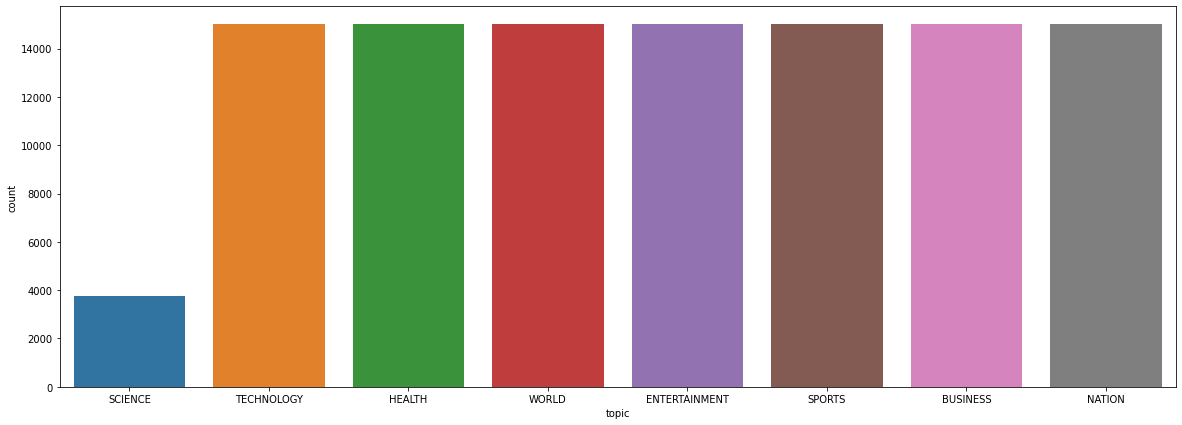

In [ ]:
ax = plt.subplots(figsize=(20,7))
sns.countplot(data.topic)

In [ ]:
#data = data[ (data.topic== 'ENTERTAINMENT')| (data.topic== 'BUSINESS')]



In [ ]:
import pandas as pd

data=data.groupby('topic').head(2000)

In [ ]:
data.shape

(16000, 2)

In [ ]:
data.tail()

topic                                              title
36818  SCIENCE  UAE's Mars Mission completes first trajectory ...
36917  SCIENCE  Secrets of the Past Unlocked With Accurate New...
36954  SCIENCE  Arianespace's Ariane 5 orbits Galaxy 30, MEV-2...
36963  SCIENCE  Microbes reanimating after 100 million years h...
37034  SCIENCE  Scientists discover how metallic blue fruits p...

In [ ]:
print("Longest length word is:\n",data.title.str.len().max())

Longest length word is:
 297


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


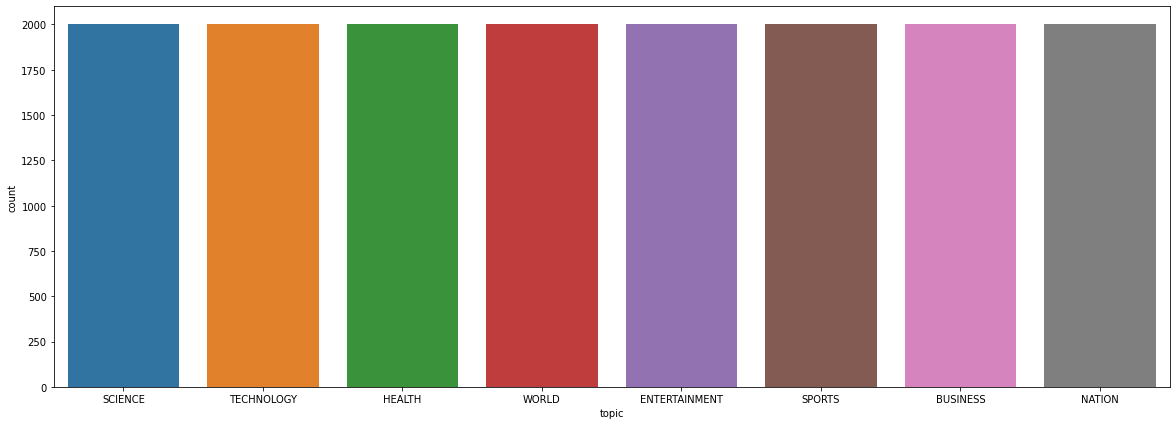

In [ ]:
ax = plt.subplots(figsize=(20,7))
sns.countplot(data.topic)

# WordCloud

In [ ]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
data.tail()

topic                                              title
36818  SCIENCE  UAE's Mars Mission completes first trajectory ...
36917  SCIENCE  Secrets of the Past Unlocked With Accurate New...
36954  SCIENCE  Arianespace's Ariane 5 orbits Galaxy 30, MEV-2...
36963  SCIENCE  Microbes reanimating after 100 million years h...
37034  SCIENCE  Scientists discover how metallic blue fruits p...

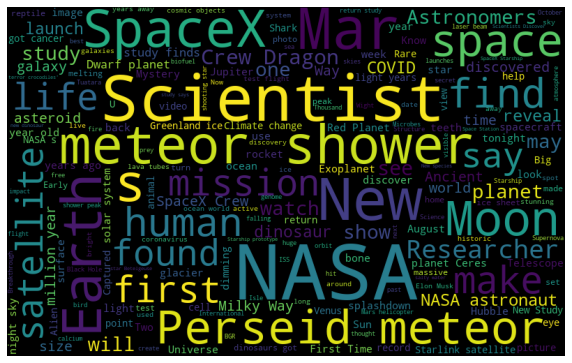

In [ ]:
subset=data[data.topic=="SCIENCE"]
text=subset.title.values                #Stored entire news articles related to business articles in the variable subset
words =" ".join(text)                  # Convert list of sentences into paragraph of sentences
create_wordcloud(words)

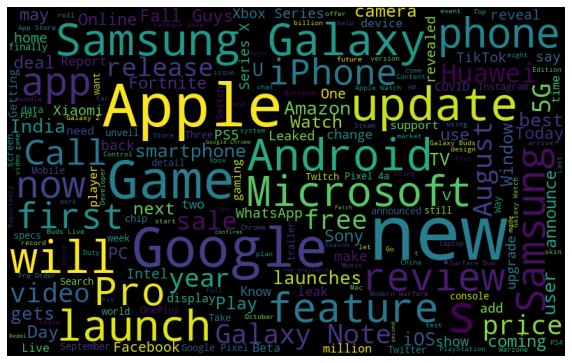

In [ ]:
subset=data[data.topic=="TECHNOLOGY"]
text=subset.title.values
words =" ".join(text)
create_wordcloud(words)

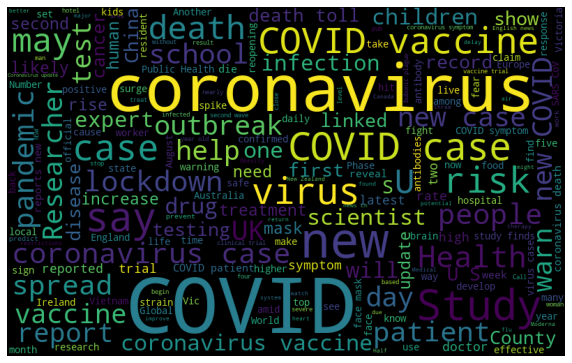

In [ ]:
subset=data[data.topic=="HEALTH"]
text=subset.title.values
words =" ".join(text)
create_wordcloud(words)

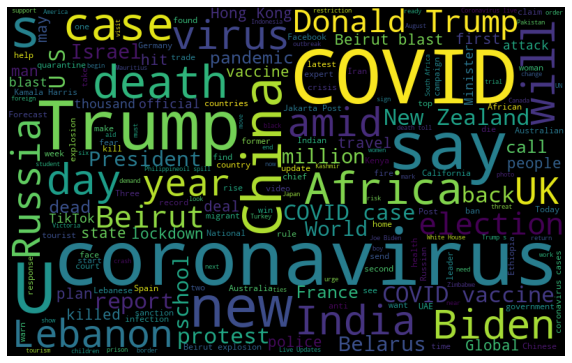

In [ ]:
subset=data[data.topic=="WORLD"]
text=subset.title.values
words =" ".join(text)
create_wordcloud(words)

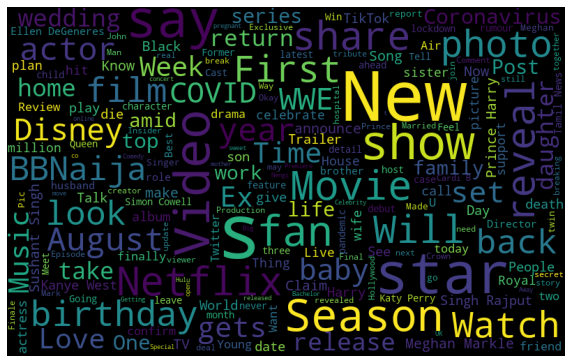

In [ ]:
subset=data[data.topic=="ENTERTAINMENT"]
text=subset.title.values
words =" ".join(text)
create_wordcloud(words)

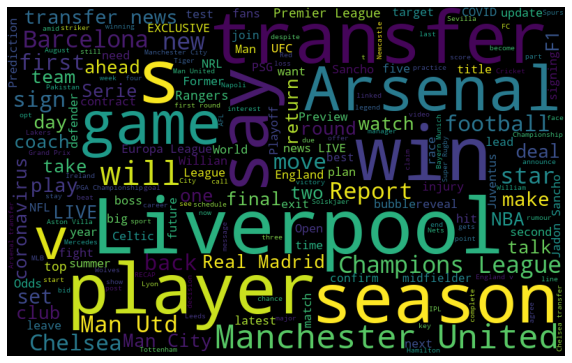

In [ ]:
subset=data[data.topic=="SPORTS"]
text=subset.title.values
words =" ".join(text)
create_wordcloud(words)

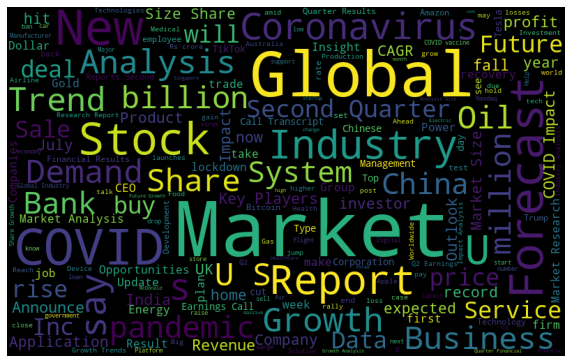

In [ ]:
subset=data[data.topic=="BUSINESS"]
text=subset.title.values
words =" ".join(text)
create_wordcloud(words)

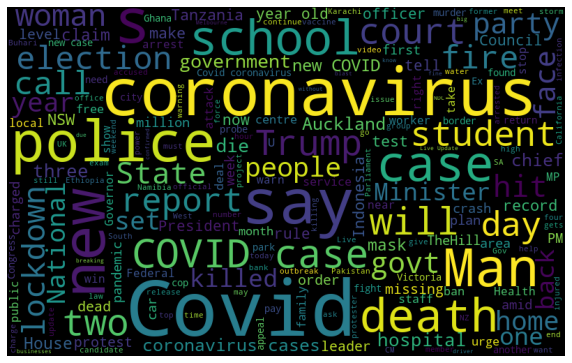

In [ ]:
subset=data[data.topic=="NATION"]
text=subset.title.values
words =" ".join(text)
create_wordcloud(words)

# Feature Engineering

# Removing the special characters

# 1) \r 2) \n

Removing Punctuations and Stopwords

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

In [ ]:
#@title
'''
def process_text(text):
   # text = text.lower().replace('\n',' ').replace('\r','').strip()  ## removing \n , \r
    text = text.lower()
    text = re.sub(' +', ' ', text)                                  ## removing multispaces into only single space
    text = re.sub(r'[^\w\s]','',text)                               ## Match a single character not present in the list below [^\w\s]
                                                                    ## \w matches any word character (equivalent to [a-zA-Z0-9_])
                                                                    ## \s matches any whitespace character (equivalent to [\r\n\t\f\v ])
    stop_words = set(stopwords.words('english'))                    ## removing stopwords like and , or , not
    word_tokens = word_tokenize(text)
    #print(stop_words)
    #print(word_tokens)
    #filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    text = " ".join(filtered_sentence)
    return text
  '''

'\ndef process_text(text):\n   # text = text.lower().replace(\'\n\',\' \').replace(\'\r\',\'\').strip()  ## removing \n , \r\n    text = text.lower()\n    text = re.sub(\' +\', \' \', text)                                  ## removing multispaces into only single space\n    text = re.sub(r\'[^\\w\\s]\',\'\',text)                               ## Match a single character not present in the list below [^\\w\\s]\n                                                                    ## \\w matches any word character (equivalent to [a-zA-Z0-9_])\n                                                                    ## \\s matches any whitespace character (equivalent to [\r\n\t\x0c\x0b ])\n    stop_words = set(stopwords.words(\'english\'))                    ## removing stopwords like and , or , not\n    word_tokens = word_tokenize(text) \n    #print(stop_words)\n    #print(word_tokens)\n    #filtered_sentence = [w for w in word_tokens if not w in stop_words] \n    filtered_sentence = [] \n    f

In [ ]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()  ## removing \n , \r
    text = re.sub(' +', ' ', text)                                  ## removing multispaces into only single space
    text = re.sub(r'[^\w\s]','',text)                               ## Match a single character not present in the list below [^\w\s]
                                                                    ## \w matches any word character (equivalent to [a-zA-Z0-9_])
                                                                    ## \s matches any whitespace character (equivalent to [\r\n\t\f\v ])
    stop_words = set(stopwords.words('english'))                    ## removing stopwords like and , or , not
    word_tokens = word_tokenize(text)
   # filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            w = ps.stem(w)
            filtered_sentence.append(w)

    text = " ".join(filtered_sentence)
    return text

In [ ]:
data['Text_parsed'] = data['title'].apply(process_text)

In [ ]:
data.head()

topic                                              title  \
0  SCIENCE  A closer look at water-splitting's solar fuel ...   
1  SCIENCE  An irresistible scent makes locusts swarm, stu...   
2  SCIENCE  Artificial intelligence warning: AI will know ...   
3  SCIENCE   Glaciers Could Have Sculpted Mars Valleys: Study   
4  SCIENCE  Perseid meteor shower 2020: What time and how ...   

                                         Text_parsed  
0          closer look watersplit solar fuel potenti  
1        irresist scent make locust swarm studi find  
2      artifici intellig warn ai know us better know  
3              glacier could sculpt mar valley studi  
4  perseid meteor shower 2020 time see huge brigh...

In [ ]:
x = data['Text_parsed']


In [ ]:
X = data['Text_parsed']
y = data['topic']

# Split the data in training & testing

# Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Category_target']= label_encoder.fit_transform(data['topic'])

In [ ]:
data.tail()

topic                                              title  \
36818  SCIENCE  UAE's Mars Mission completes first trajectory ...   
36917  SCIENCE  Secrets of the Past Unlocked With Accurate New...   
36954  SCIENCE  Arianespace's Ariane 5 orbits Galaxy 30, MEV-2...   
36963  SCIENCE  Microbes reanimating after 100 million years h...   
37034  SCIENCE  Scientists discover how metallic blue fruits p...   

                                             Text_parsed  Category_target  
36818  uae mar mission complet first trajectori corre...                4  
36917  secret past unlock accur new intern carbon dat...                4  
36954     arianespac arian 5 orbit galaxi 30 mev2 bsat4b                4  
36963  microb reanim 100 million year taken suspend a...                4  
37034  scientist discov metal blue fruit produc iride...                4

In [ ]:
X = data['Text_parsed']
y = data['Category_target']

##Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X1 = cv.fit_transform(X).toarray()
y1 = data.iloc[:, 3].values

In [ ]:
X1.shape

(16000, 18824)

##Tf-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidf = TfidfVectorizer()
X2 = tfidf.fit_transform(X).toarray()
y2 = data.iloc[:, 3].values

##TF-IDF with unigrams and bigrams

In [ ]:
#@title
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',min_df = 0.05, max_df = 0.6, ngram_range = (1, 3))#min_df: remove the words which has occurred in less than ‘min_df’ number of files.
X3 = tfidf.fit_transform(X).toarray()
y3 = data.iloc[:, 3].values

##Splitting training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 =train_test_split(X1, y1, test_size=0.20, random_state=0, stratify=y1)

X_train2,X_test2,y_train2,y_test2 =train_test_split(X2, y2, test_size=0.20, random_state=0, stratify=y2)

X_train3,X_test3,y_train3,y_test3 =train_test_split(X3, y3, test_size=0.20, random_state=0, stratify=y3)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train1,X_test1,y_train1,y_test1 =train_test_split(X1, y1, test_size=0.20, random_state=0, stratify=y1)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn import metrics

BOW+SVC

In [ ]:

model11 = LinearSVC()
model11.fit(X_train1, y_train1)
y_pred11 = model11.predict(X_test1)
y_pred_11 = model11.decision_function(X_test1)

# Classification report
print('CLASSIFICATIION METRICS-BOW+SVC')
print(metrics.classification_report(y_test1, y_pred11,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-BOW+SVC
               precision    recall  f1-score   support

      SCIENCE       0.72      0.62      0.67       400
   TECHNOLOGY       0.74      0.73      0.74       400
       HEALTH       0.63      0.70      0.67       400
        WORLD       0.50      0.53      0.51       400
ENTERTAINMENT       0.88      0.84      0.86       400
       SPORTS       0.86      0.82      0.84       400
     BUSINESS       0.80      0.81      0.80       400
       NATION       0.56      0.60      0.58       400

     accuracy                           0.71      3200
    macro avg       0.71      0.71      0.71      3200
 weighted avg       0.71      0.71      0.71      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


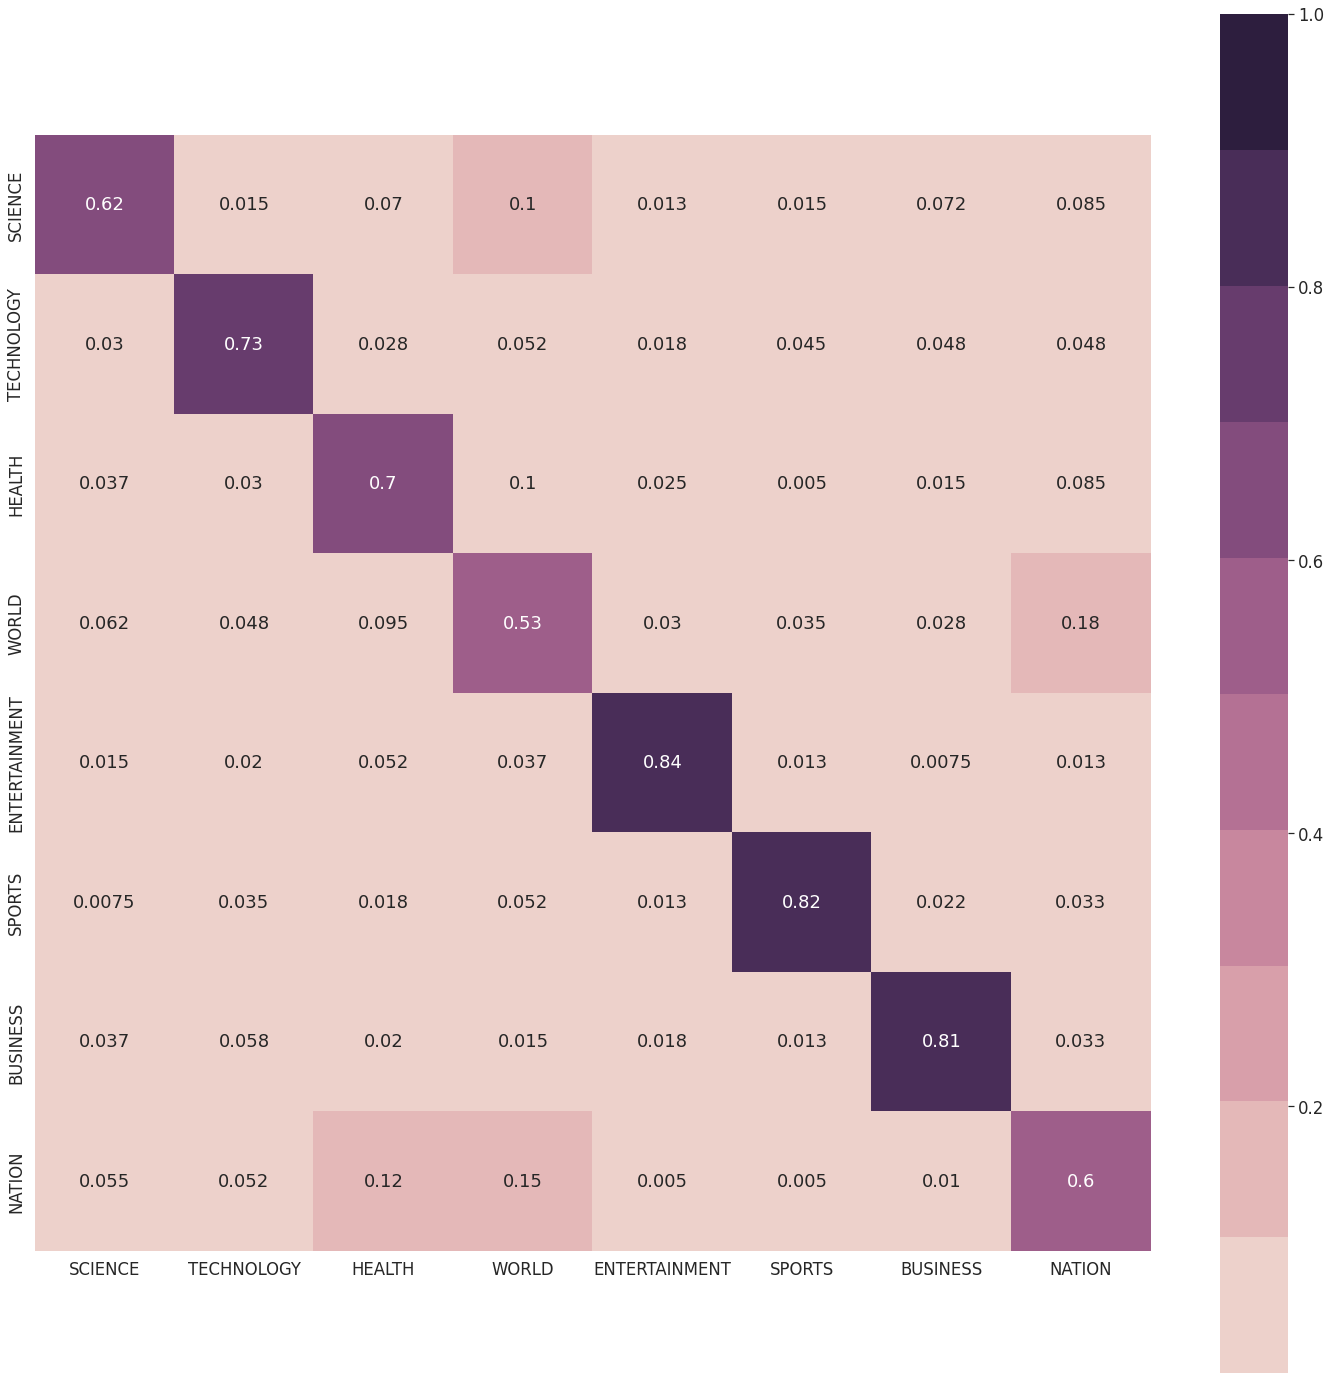

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test1, y_pred11)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

TF-IDF+SVC

In [ ]:

model21 = LinearSVC()
model21.fit(X_train2, y_train2)
y_pred21 = model21.predict(X_test2)
y_pred_21 = model21.decision_function(X_test2)

# Classification report
print('CLASSIFICATIION METRICS -SVC')
print(metrics.classification_report(y_test2, y_pred21,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS -SVC
               precision    recall  f1-score   support

      SCIENCE       0.76      0.66      0.70       400
   TECHNOLOGY       0.73      0.79      0.76       400
       HEALTH       0.68      0.77      0.72       400
        WORLD       0.59      0.59      0.59       400
ENTERTAINMENT       0.90      0.86      0.88       400
       SPORTS       0.89      0.86      0.88       400
     BUSINESS       0.83      0.83      0.83       400
       NATION       0.62      0.61      0.62       400

     accuracy                           0.75      3200
    macro avg       0.75      0.75      0.75      3200
 weighted avg       0.75      0.75      0.75      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


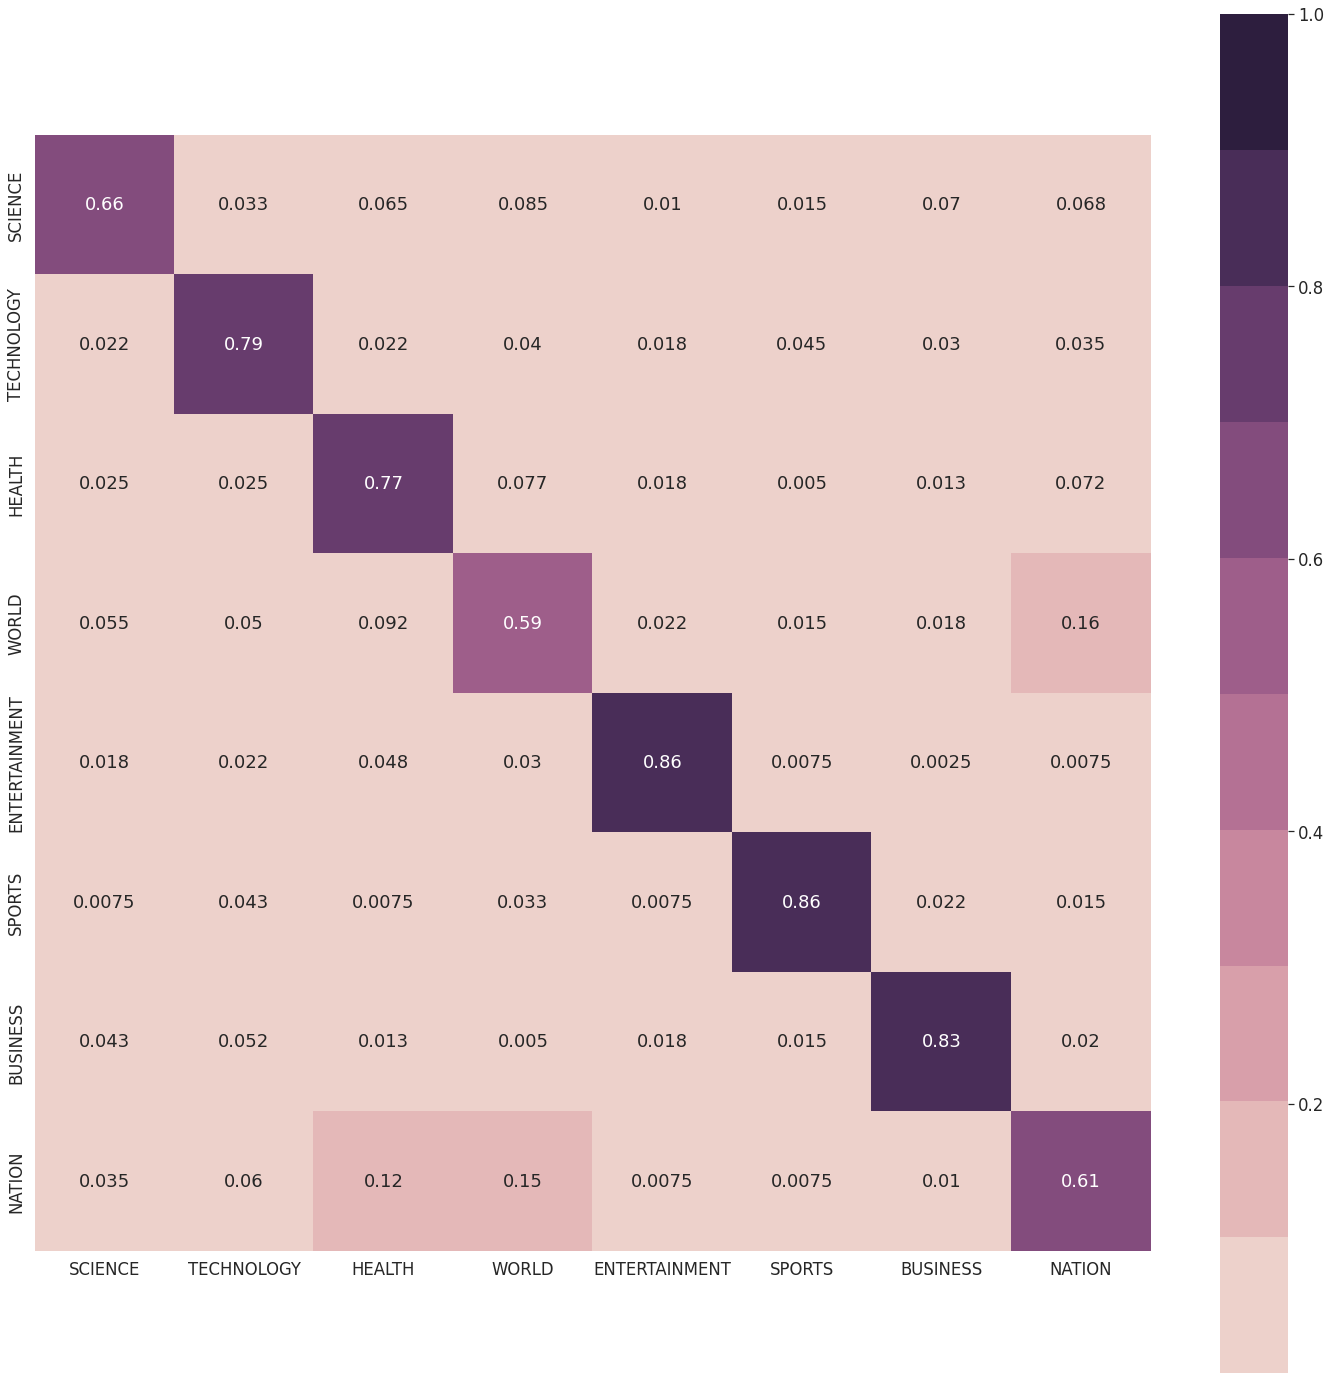

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test2, y_pred21)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

BOW+KNN

In [ ]:

model12 = KNeighborsClassifier()
model12.fit(X_train1, y_train1)
y_pred12 = model12.predict(X_test1)
y_pred_12 = model12.predict_proba(X_test1)

# Classification report
print('CLASSIFICATIION METRICS-BOW+KNN')
print(metrics.classification_report(y_test1, y_pred12,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-BOW+KNN
               precision    recall  f1-score   support

      SCIENCE       0.66      0.28      0.39       400
   TECHNOLOGY       0.19      0.90      0.31       400
       HEALTH       0.59      0.54      0.56       400
        WORLD       0.42      0.03      0.05       400
ENTERTAINMENT       0.72      0.72      0.72       400
       SPORTS       0.94      0.12      0.20       400
     BUSINESS       0.92      0.29      0.44       400
       NATION       0.54      0.19      0.28       400

     accuracy                           0.38      3200
    macro avg       0.62      0.38      0.37      3200
 weighted avg       0.62      0.38      0.37      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


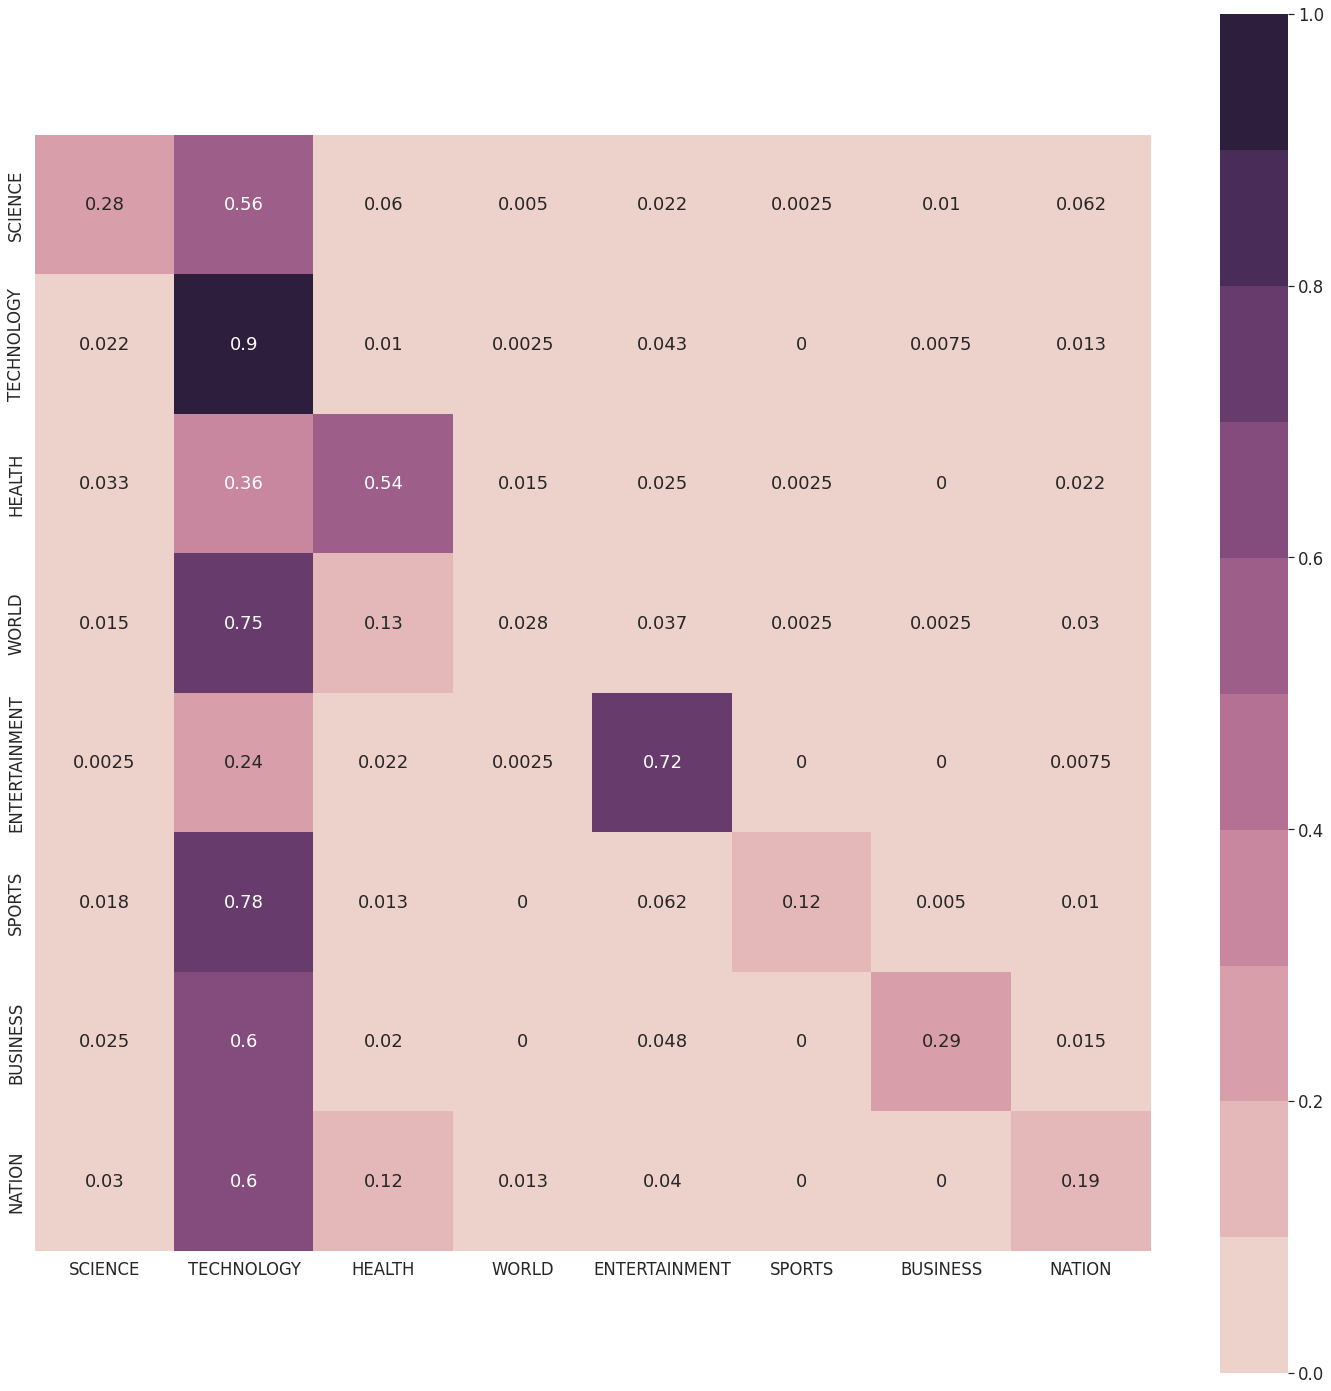

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test1, y_pred12)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

TF-IDF+KNN

In [ ]:

model22 = KNeighborsClassifier()
model22.fit(X_train2, y_train2)
y_pred22 = model22.predict(X_test2)
y_pred_22 = model22.predict_proba(X_test2)

# Classification report
print('CLASSIFICATIION METRICS-KNN')
print(metrics.classification_report(y_test2, y_pred22,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-KNN
               precision    recall  f1-score   support

      SCIENCE       0.62      0.64      0.63       400
   TECHNOLOGY       0.72      0.71      0.71       400
       HEALTH       0.51      0.78      0.62       400
        WORLD       0.57      0.43      0.50       400
ENTERTAINMENT       0.82      0.85      0.84       400
       SPORTS       0.88      0.75      0.81       400
     BUSINESS       0.81      0.80      0.80       400
       NATION       0.61      0.53      0.57       400

     accuracy                           0.68      3200
    macro avg       0.69      0.68      0.68      3200
 weighted avg       0.69      0.68      0.68      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


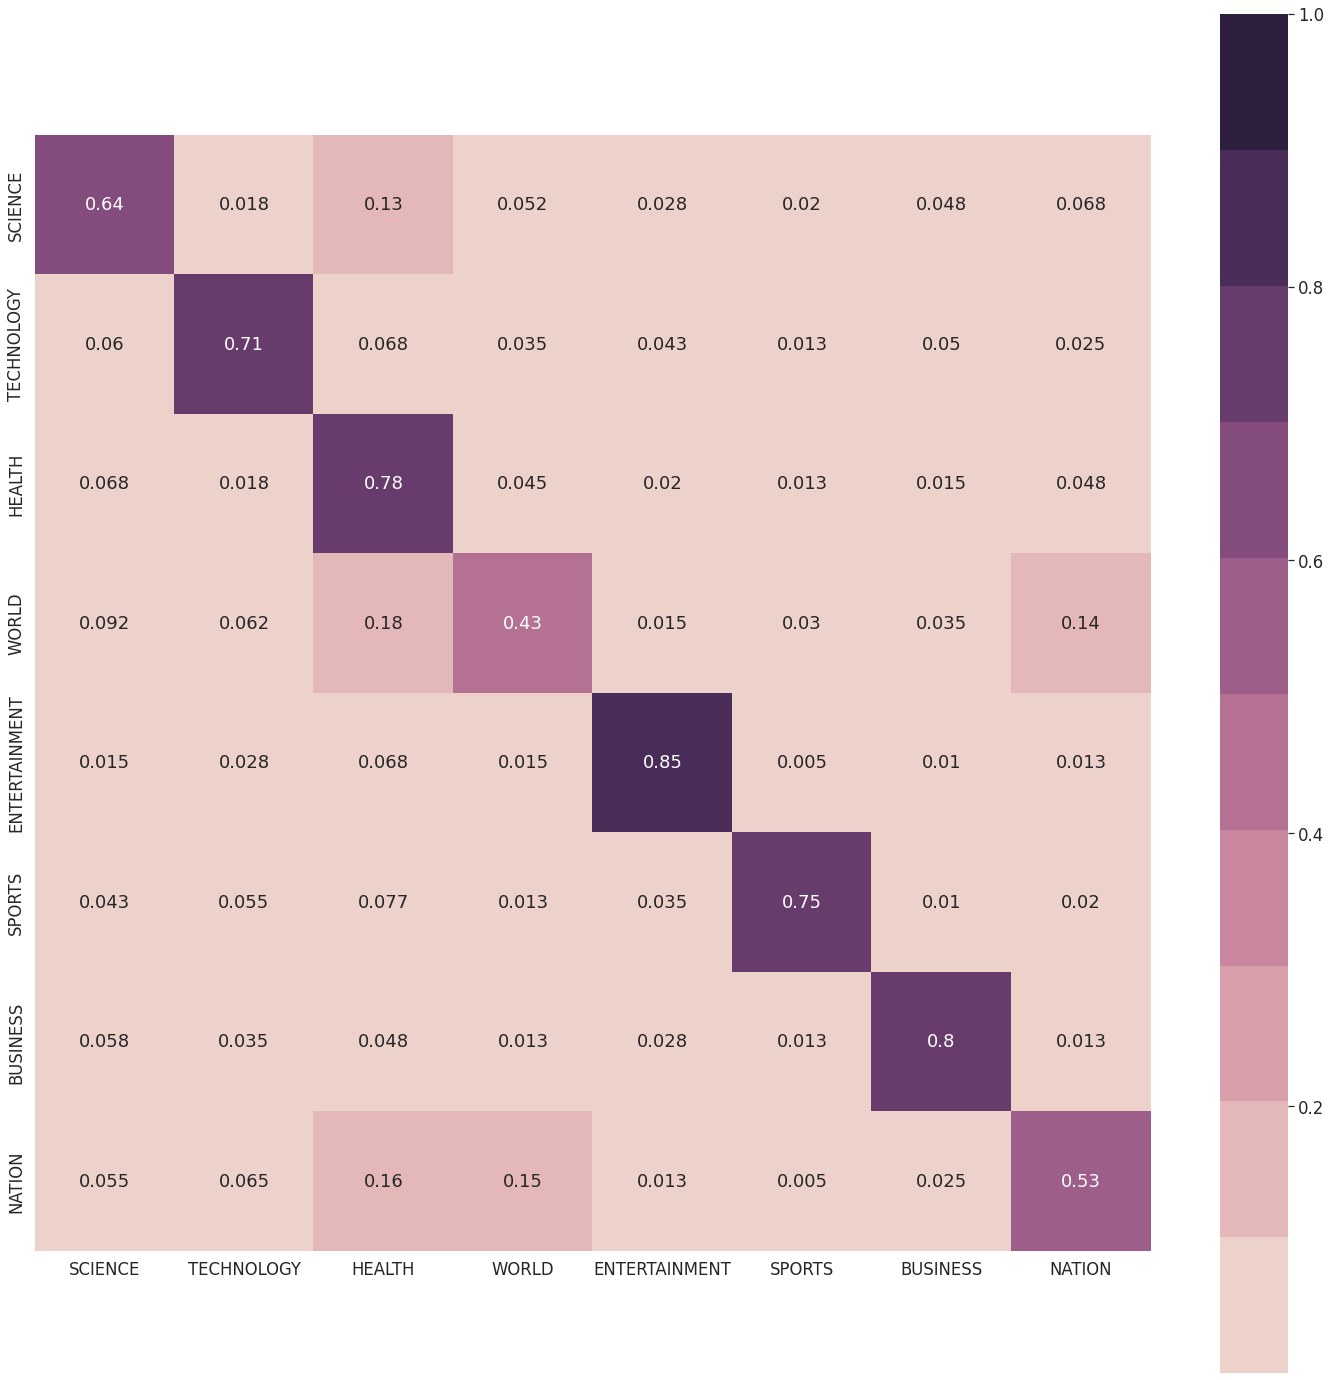

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test2, y_pred22)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

BOW+DecisionTreeClassifier

In [ ]:

model13 = DecisionTreeClassifier()
model13.fit(X_train1, y_train1)
y_pred13 = model13.predict(X_test1)
y_pred_13 = y_pred13

# Classification report
print('CLASSIFICATIION METRICS-BOW+DT')
print(metrics.classification_report(y_test1, y_pred13,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-BOW+DT
               precision    recall  f1-score   support

      SCIENCE       0.69      0.53      0.60       400
   TECHNOLOGY       0.57      0.63      0.60       400
       HEALTH       0.57      0.66      0.61       400
        WORLD       0.37      0.47      0.41       400
ENTERTAINMENT       0.85      0.76      0.80       400
       SPORTS       0.76      0.62      0.69       400
     BUSINESS       0.70      0.72      0.71       400
       NATION       0.51      0.48      0.49       400

     accuracy                           0.61      3200
    macro avg       0.63      0.61      0.61      3200
 weighted avg       0.63      0.61      0.61      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


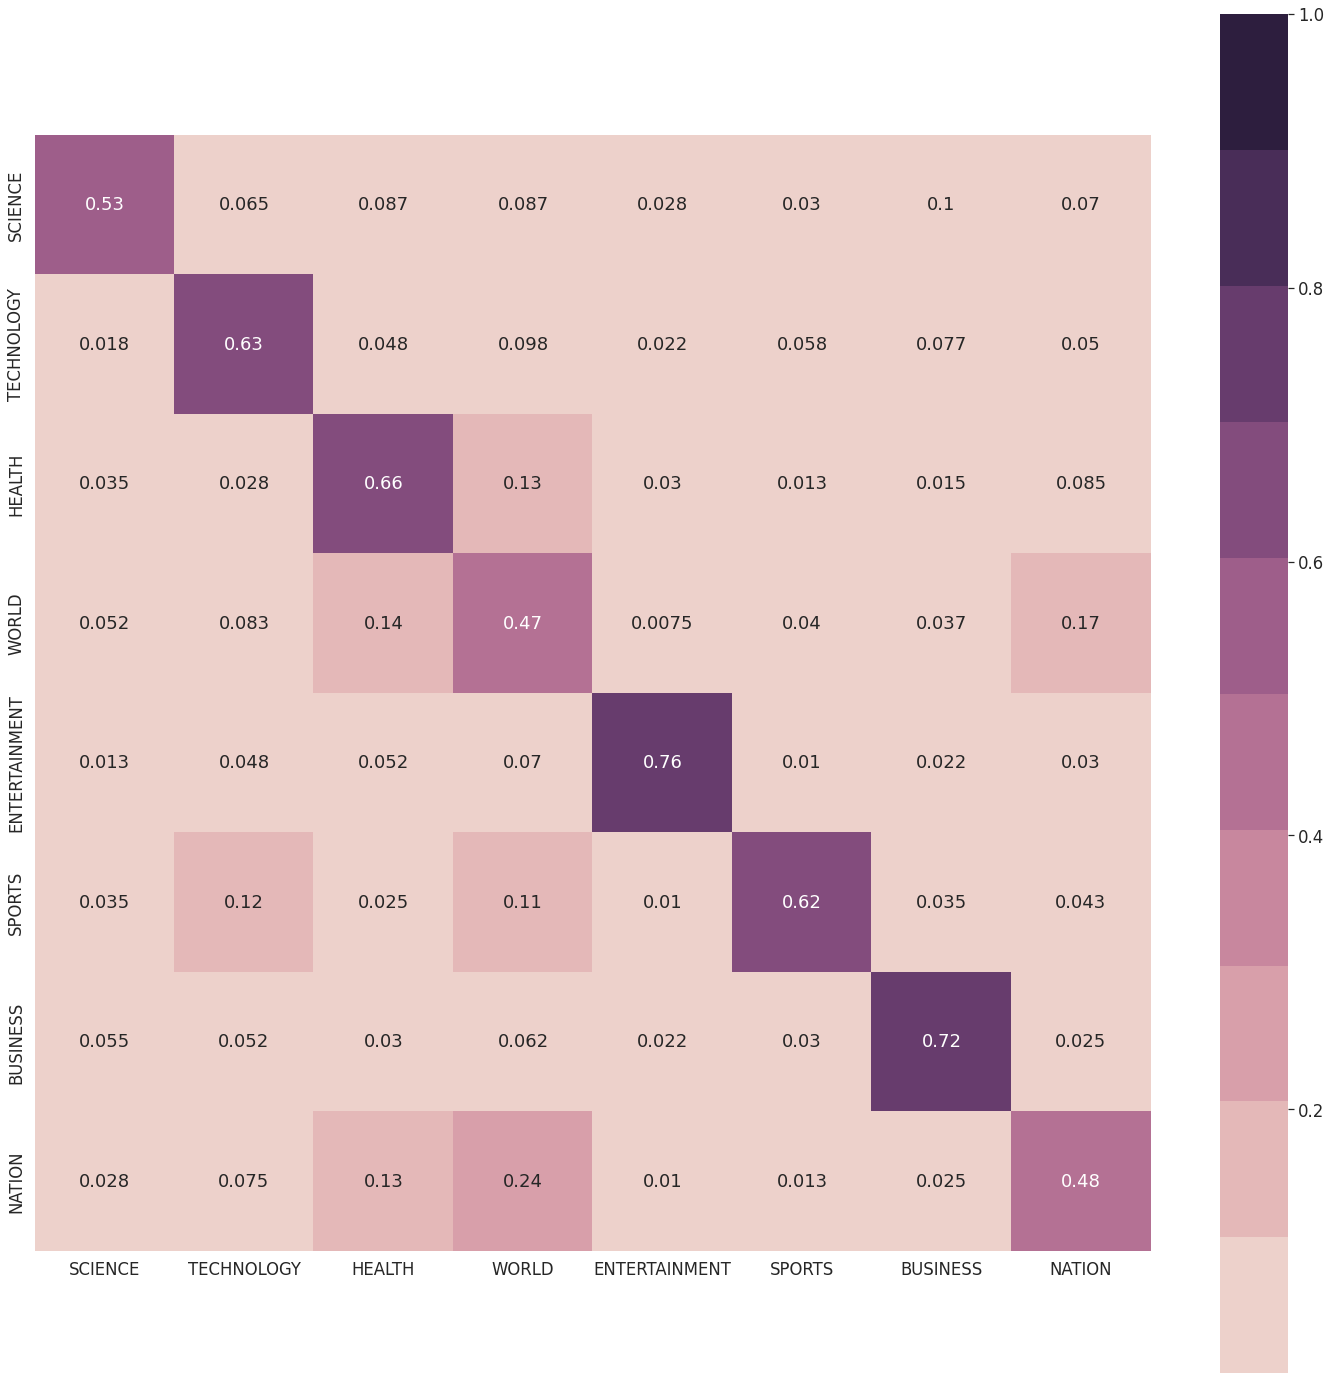

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test1, y_pred13)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

TF-IDF+DecisionTreeClassifier

In [ ]:


model23 = DecisionTreeClassifier()
model23.fit(X_train2, y_train2)
y_pred23 = model23.predict(X_test2)
y_pred_23 = y_pred23

# Classification report
print('CLASSIFICATIION METRICS-TF-IDF+DT')
print(metrics.classification_report(y_test2, y_pred23,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-TF-IDF+DT
               precision    recall  f1-score   support

      SCIENCE       0.61      0.50      0.55       400
   TECHNOLOGY       0.56      0.58      0.57       400
       HEALTH       0.53      0.62      0.57       400
        WORLD       0.38      0.47      0.42       400
ENTERTAINMENT       0.82      0.77      0.79       400
       SPORTS       0.70      0.60      0.65       400
     BUSINESS       0.70      0.70      0.70       400
       NATION       0.49      0.46      0.47       400

     accuracy                           0.59      3200
    macro avg       0.60      0.59      0.59      3200
 weighted avg       0.60      0.59      0.59      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


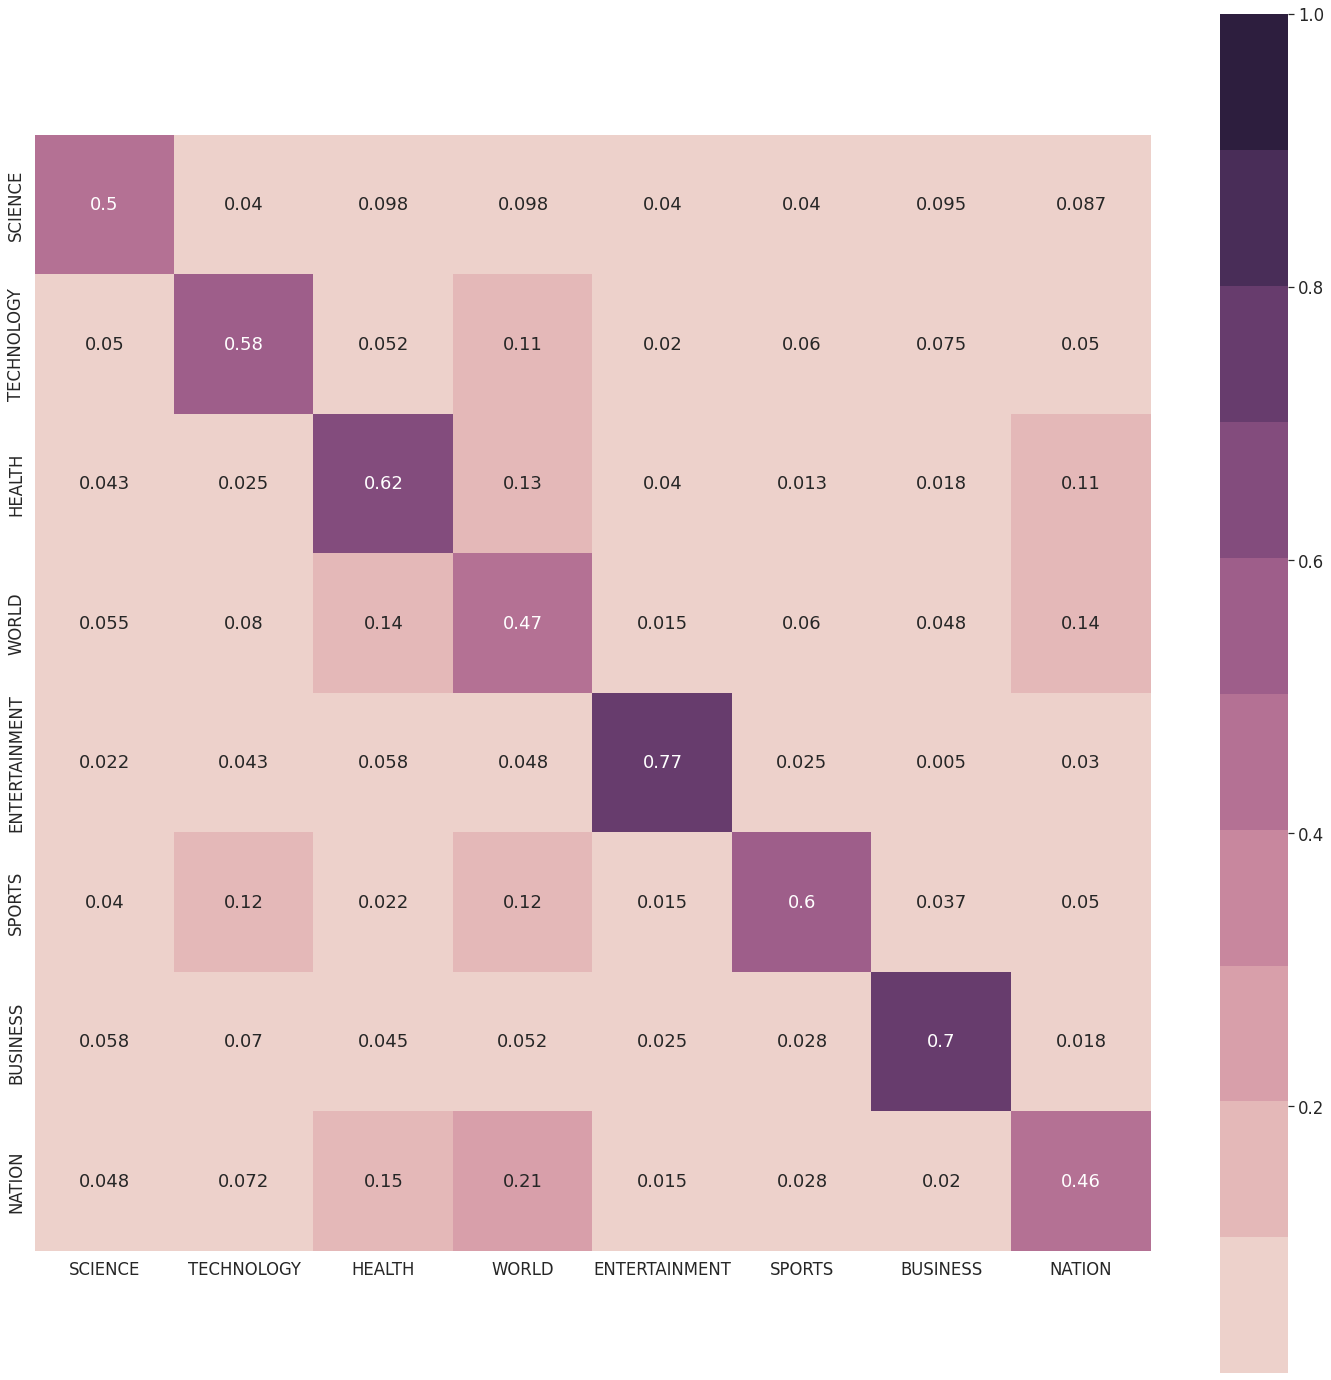

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test2, y_pred23)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

BOW+ RandomForestClassifier

In [ ]:


model14 =  RandomForestClassifier()
model14.fit(X_train1, y_train1)
y_pred14 = model14.predict(X_test1)
y_pred_14 = model14.predict_proba(X_test1)

# Classification report
print('CLASSIFICATIION METRICS-BOW+ RandomForestClassifier')
print(metrics.classification_report(y_test1, y_pred14,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-BOW+ RandomForestClassifier
               precision    recall  f1-score   support

      SCIENCE       0.76      0.56      0.65       400
   TECHNOLOGY       0.68      0.66      0.67       400
       HEALTH       0.58      0.83      0.68       400
        WORLD       0.43      0.54      0.48       400
ENTERTAINMENT       0.87      0.83      0.85       400
       SPORTS       0.85      0.70      0.77       400
     BUSINESS       0.77      0.80      0.78       400
       NATION       0.63      0.49      0.55       400

     accuracy                           0.68      3200
    macro avg       0.69      0.68      0.68      3200
 weighted avg       0.69      0.68      0.68      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


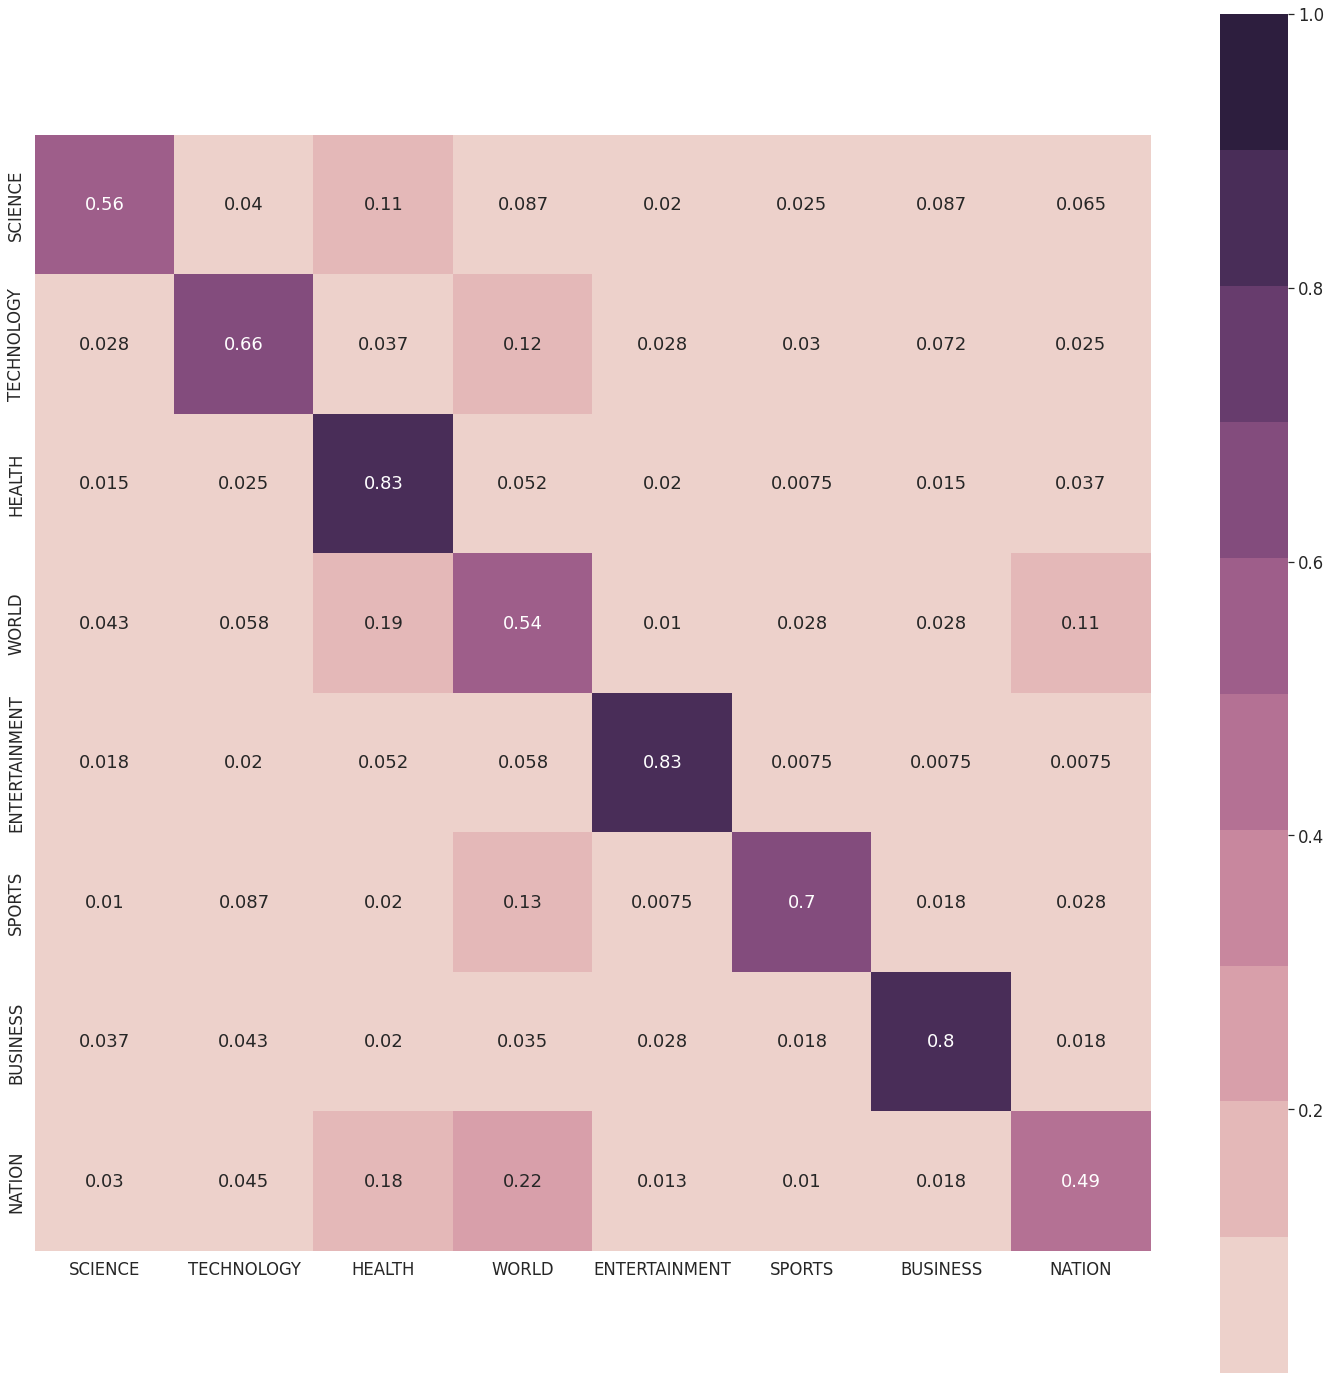

In [ ]:
import seaborn as sn
import numpy as np



cm = confusion_matrix(y_test1, y_pred14)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

TF-IDF+ RandomForestClassifier

In [ ]:


model24 =  RandomForestClassifier()
model24.fit(X_train2, y_train2)
y_pred24 = model24.predict(X_test2)
y_pred_24 = model24.predict_proba(X_test2)

# Classification report
print('CLASSIFICATIION METRICS-TF-IDF+RFC')
print(metrics.classification_report(y_test2, y_pred24,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-TF-IDF+RFC
               precision    recall  f1-score   support

      SCIENCE       0.76      0.56      0.64       400
   TECHNOLOGY       0.66      0.70      0.68       400
       HEALTH       0.59      0.81      0.68       400
        WORLD       0.40      0.57      0.47       400
ENTERTAINMENT       0.88      0.81      0.85       400
       SPORTS       0.85      0.69      0.76       400
     BUSINESS       0.79      0.78      0.79       400
       NATION       0.64      0.46      0.54       400

     accuracy                           0.67      3200
    macro avg       0.70      0.67      0.67      3200
 weighted avg       0.70      0.67      0.67      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


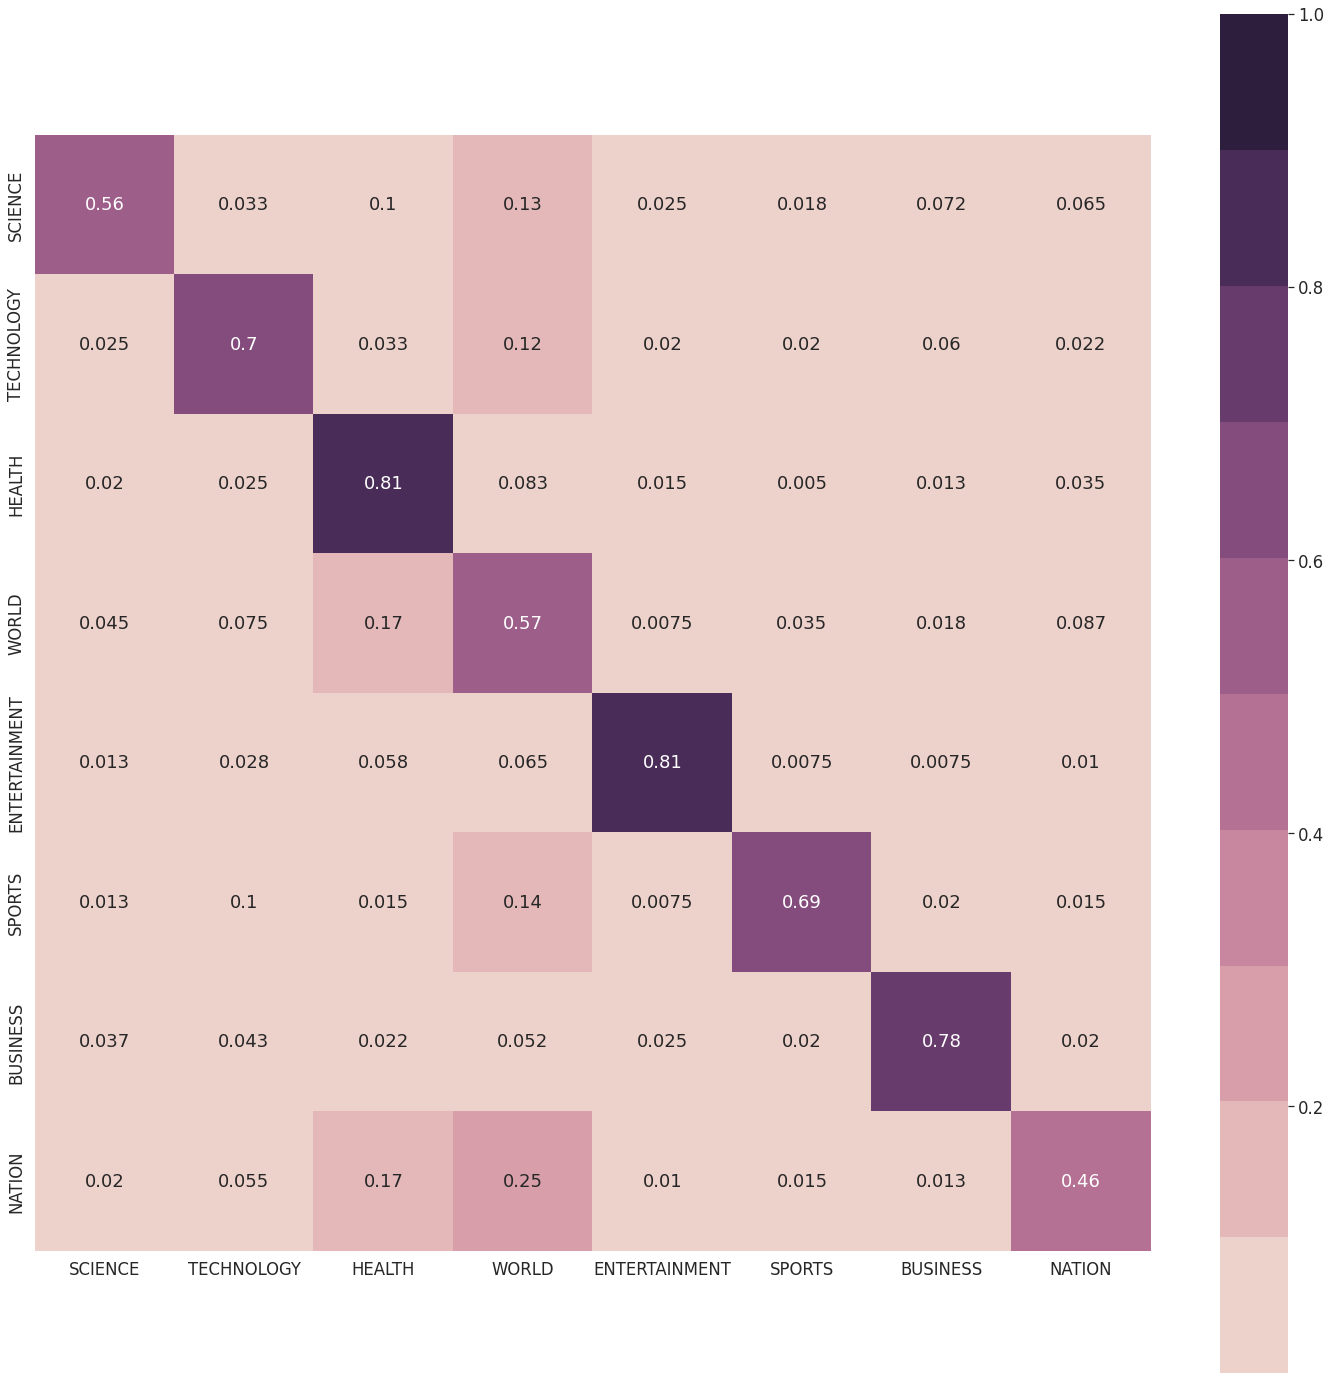

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test2, y_pred24)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

BOW+ LogisticRegression

In [ ]:

model15 =  LogisticRegression(max_iter=300)
model15.fit(X_train1, y_train1)
y_pred15 = model15.predict(X_test1)
y_pred_15 = model15.decision_function(X_test1)

# Classification report
print('CLASSIFICATIION METRICS-BOW+ LogisticRegression')
print(metrics.classification_report(y_test1, y_pred15,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-BOW+ LogisticRegression
               precision    recall  f1-score   support

      SCIENCE       0.73      0.63      0.68       400
   TECHNOLOGY       0.74      0.77      0.75       400
       HEALTH       0.68      0.73      0.70       400
        WORLD       0.52      0.58      0.55       400
ENTERTAINMENT       0.90      0.86      0.88       400
       SPORTS       0.89      0.84      0.86       400
     BUSINESS       0.82      0.83      0.82       400
       NATION       0.59      0.60      0.60       400

     accuracy                           0.73      3200
    macro avg       0.73      0.73      0.73      3200
 weighted avg       0.73      0.73      0.73      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


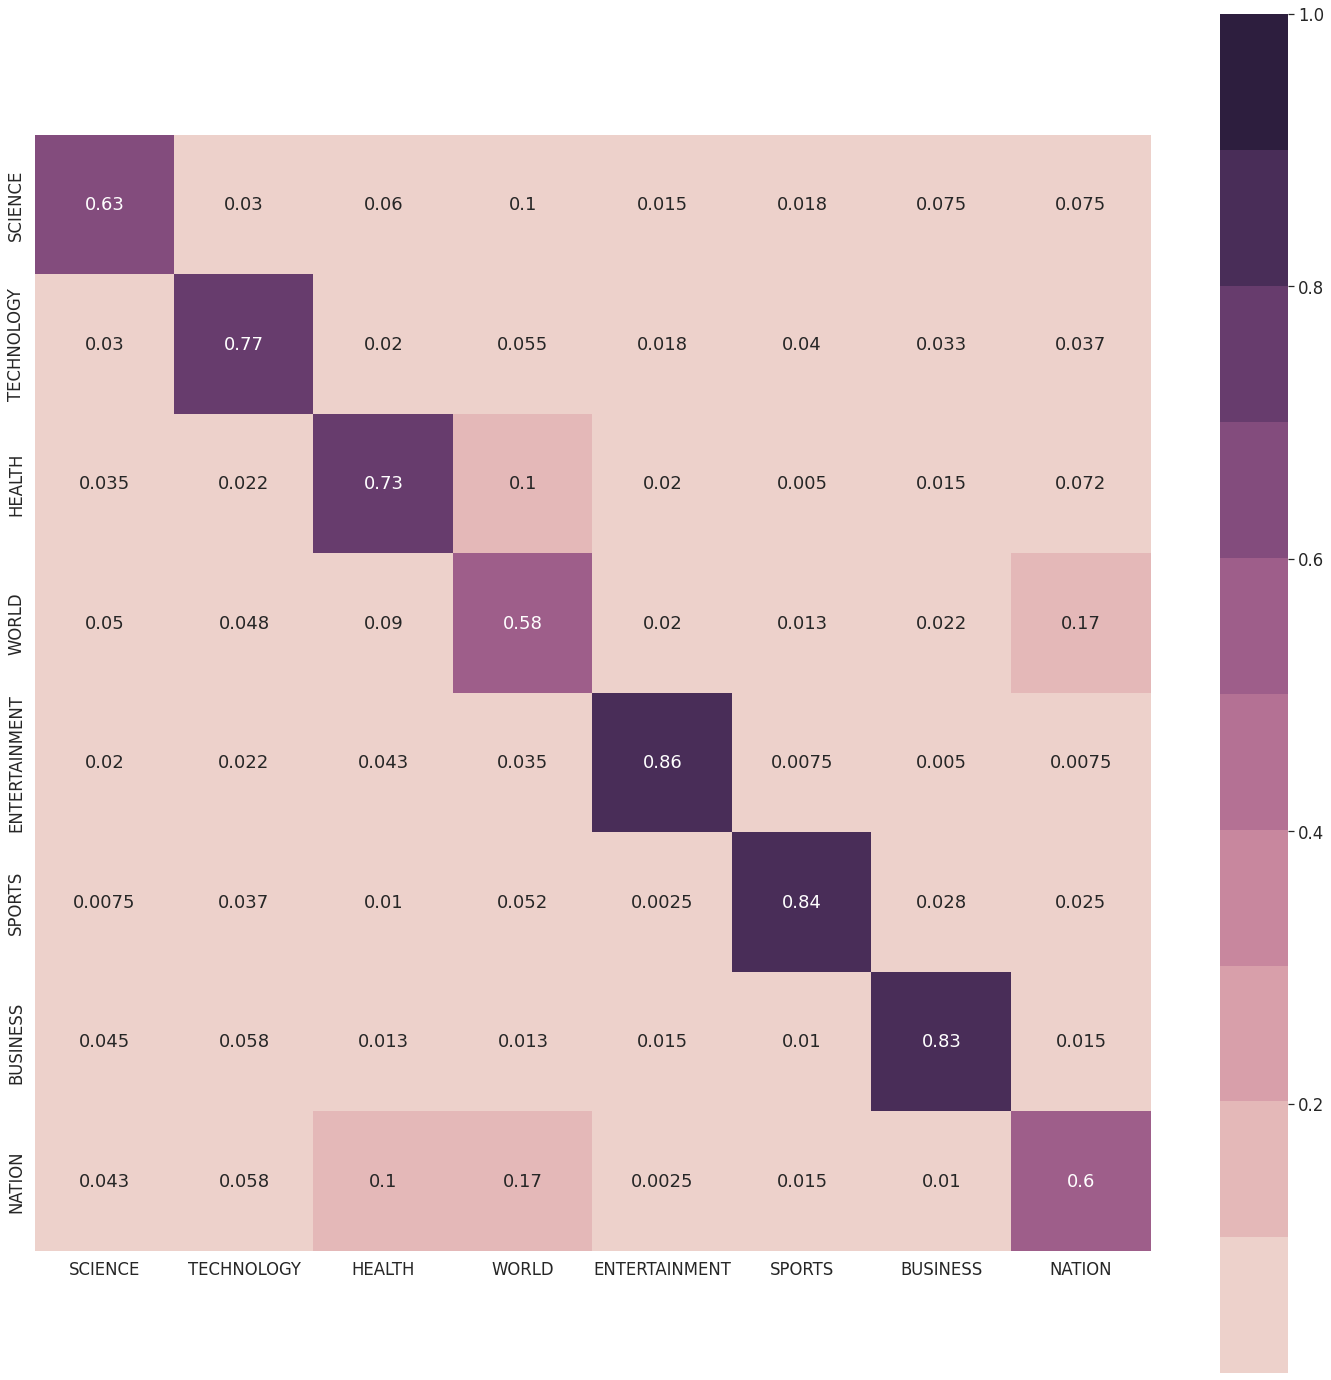

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test1, y_pred15)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

TF-IDF+ LogisticRegression

In [ ]:


model25 =  LogisticRegression(max_iter=300)
model25.fit(X_train2, y_train2)
y_pred25 = model25.predict(X_test2)
y_pred_25 = model25.decision_function(X_test2)

# Classification report
print('CLASSIFICATIION METRICS-TF+IDFLogisticRegression')
print(metrics.classification_report(y_test2, y_pred25,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-TF+IDFLogisticRegression
               precision    recall  f1-score   support

      SCIENCE       0.76      0.61      0.67       400
   TECHNOLOGY       0.70      0.84      0.76       400
       HEALTH       0.68      0.77      0.72       400
        WORLD       0.55      0.61      0.58       400
ENTERTAINMENT       0.91      0.84      0.88       400
       SPORTS       0.88      0.84      0.86       400
     BUSINESS       0.83      0.83      0.83       400
       NATION       0.65      0.56      0.60       400

     accuracy                           0.74      3200
    macro avg       0.75      0.74      0.74      3200
 weighted avg       0.75      0.74      0.74      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


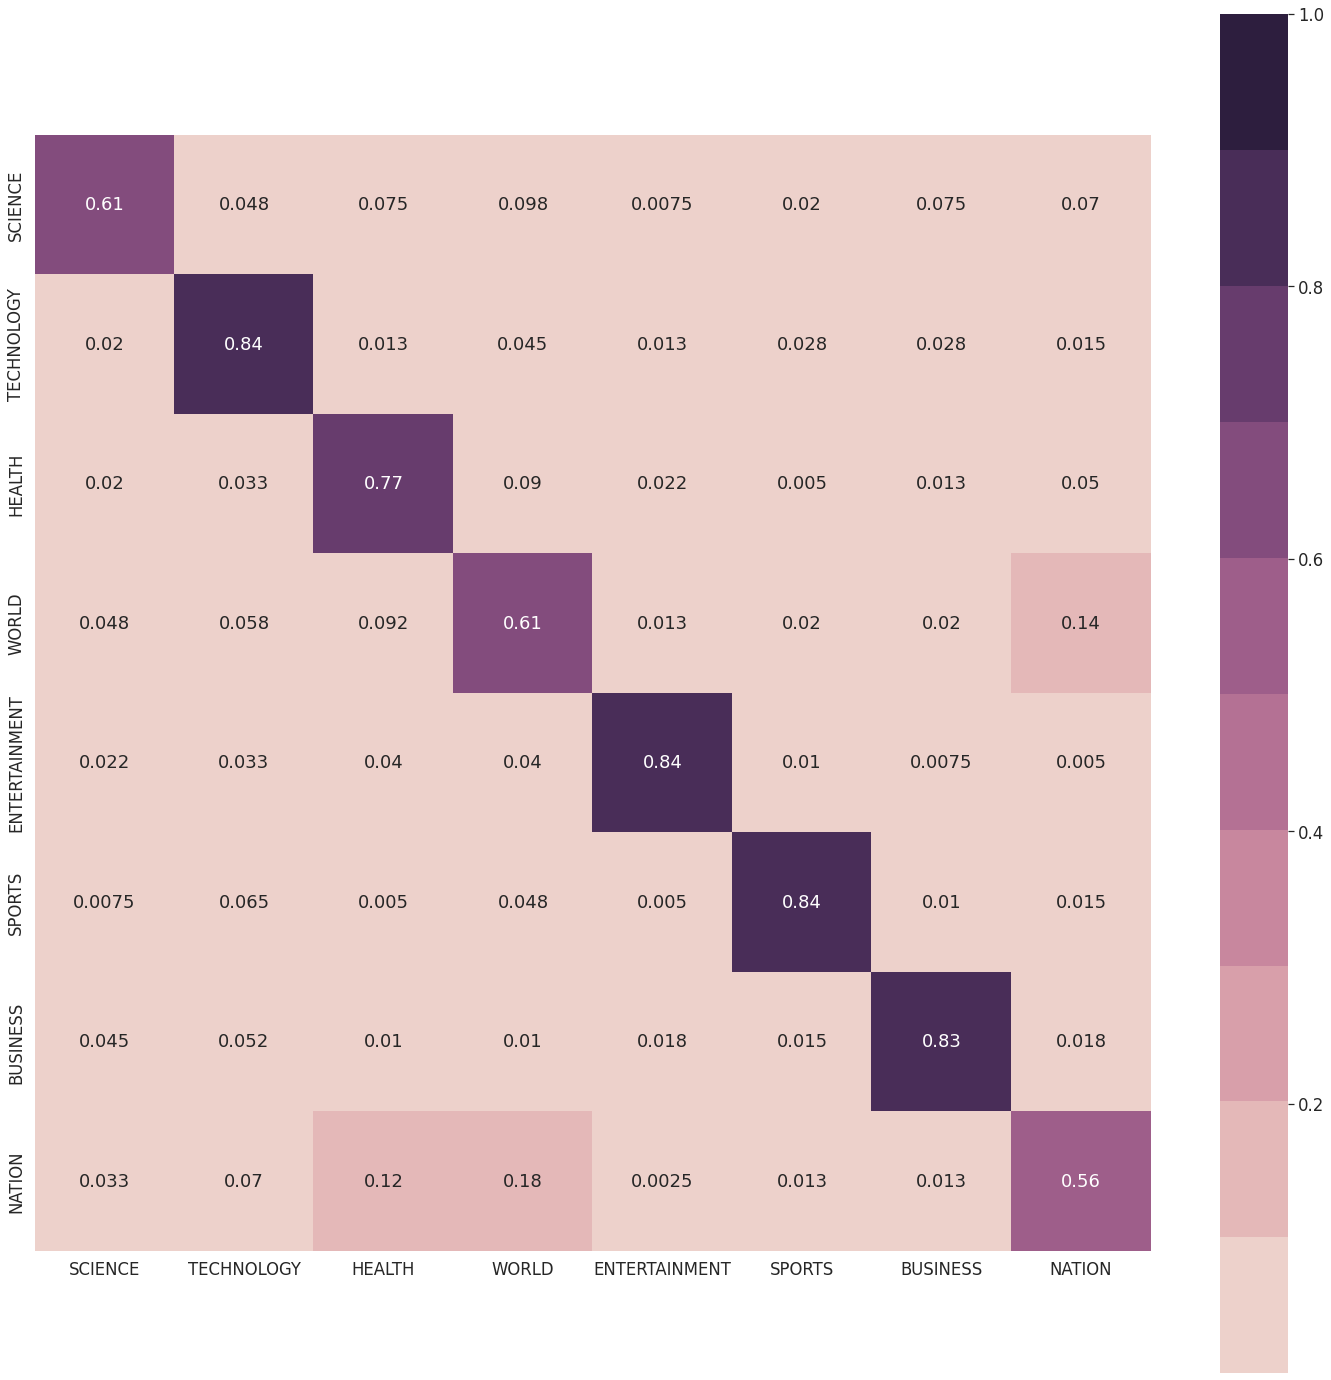

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test2, y_pred25)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

BOW+ GaussianNB

In [ ]:



model16 =  GaussianNB()
model16.fit(X_train1, y_train1)
y_pred16 = model16.predict(X_test1)
#y_pred_16 = model16.decision_function(X_test1)

# Classification report
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test1, y_pred16,target_names= data['topic'].unique()))

ttttCLASSIFICATIION METRICSn
               precision    recall  f1-score   support

      SCIENCE       0.76      0.40      0.53       400
   TECHNOLOGY       0.81      0.65      0.72       400
       HEALTH       0.49      0.60      0.54       400
        WORLD       0.50      0.34      0.41       400
ENTERTAINMENT       0.65      0.88      0.74       400
       SPORTS       0.82      0.77      0.79       400
     BUSINESS       0.66      0.75      0.70       400
       NATION       0.43      0.57      0.49       400

     accuracy                           0.62      3200
    macro avg       0.64      0.62      0.62      3200
 weighted avg       0.64      0.62      0.62      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


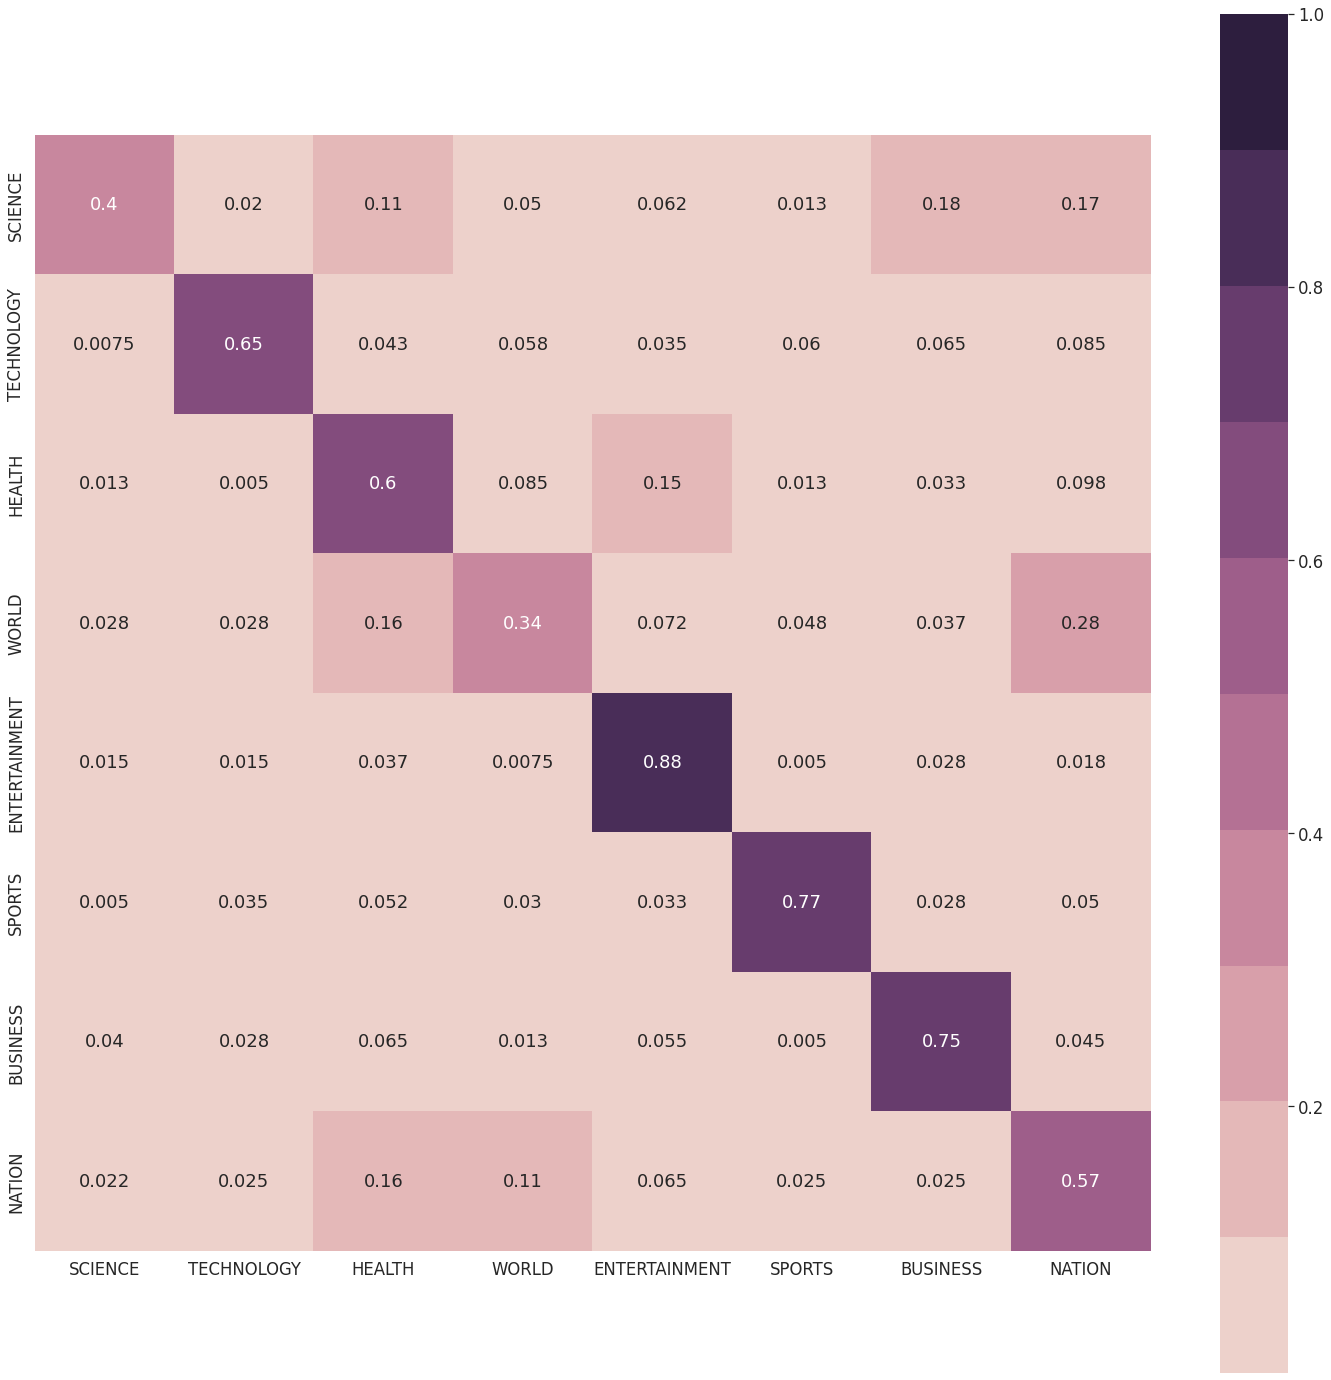

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test1, y_pred16)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

TF-IDF+ GaussianNB

In [ ]:



model26 =  GaussianNB()
model26.fit(X_train2, y_train2)
y_pred26 = model26.predict(X_test2)
#y_pred_26 = model26.decision_function(X_test2)

# Classification report
print('CLASSIFICATIION METRICS-GaussianNB')
print(metrics.classification_report(y_test2, y_pred26,target_names= data['topic'].unique()))

CLASSIFICATIION METRICS-GaussianNB
               precision    recall  f1-score   support

      SCIENCE       0.65      0.45      0.53       400
   TECHNOLOGY       0.73      0.69      0.71       400
       HEALTH       0.54      0.60      0.57       400
        WORLD       0.46      0.37      0.41       400
ENTERTAINMENT       0.68      0.81      0.74       400
       SPORTS       0.78      0.76      0.77       400
     BUSINESS       0.68      0.72      0.70       400
       NATION       0.43      0.53      0.48       400

     accuracy                           0.61      3200
    macro avg       0.62      0.61      0.61      3200
 weighted avg       0.62      0.61      0.61      3200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


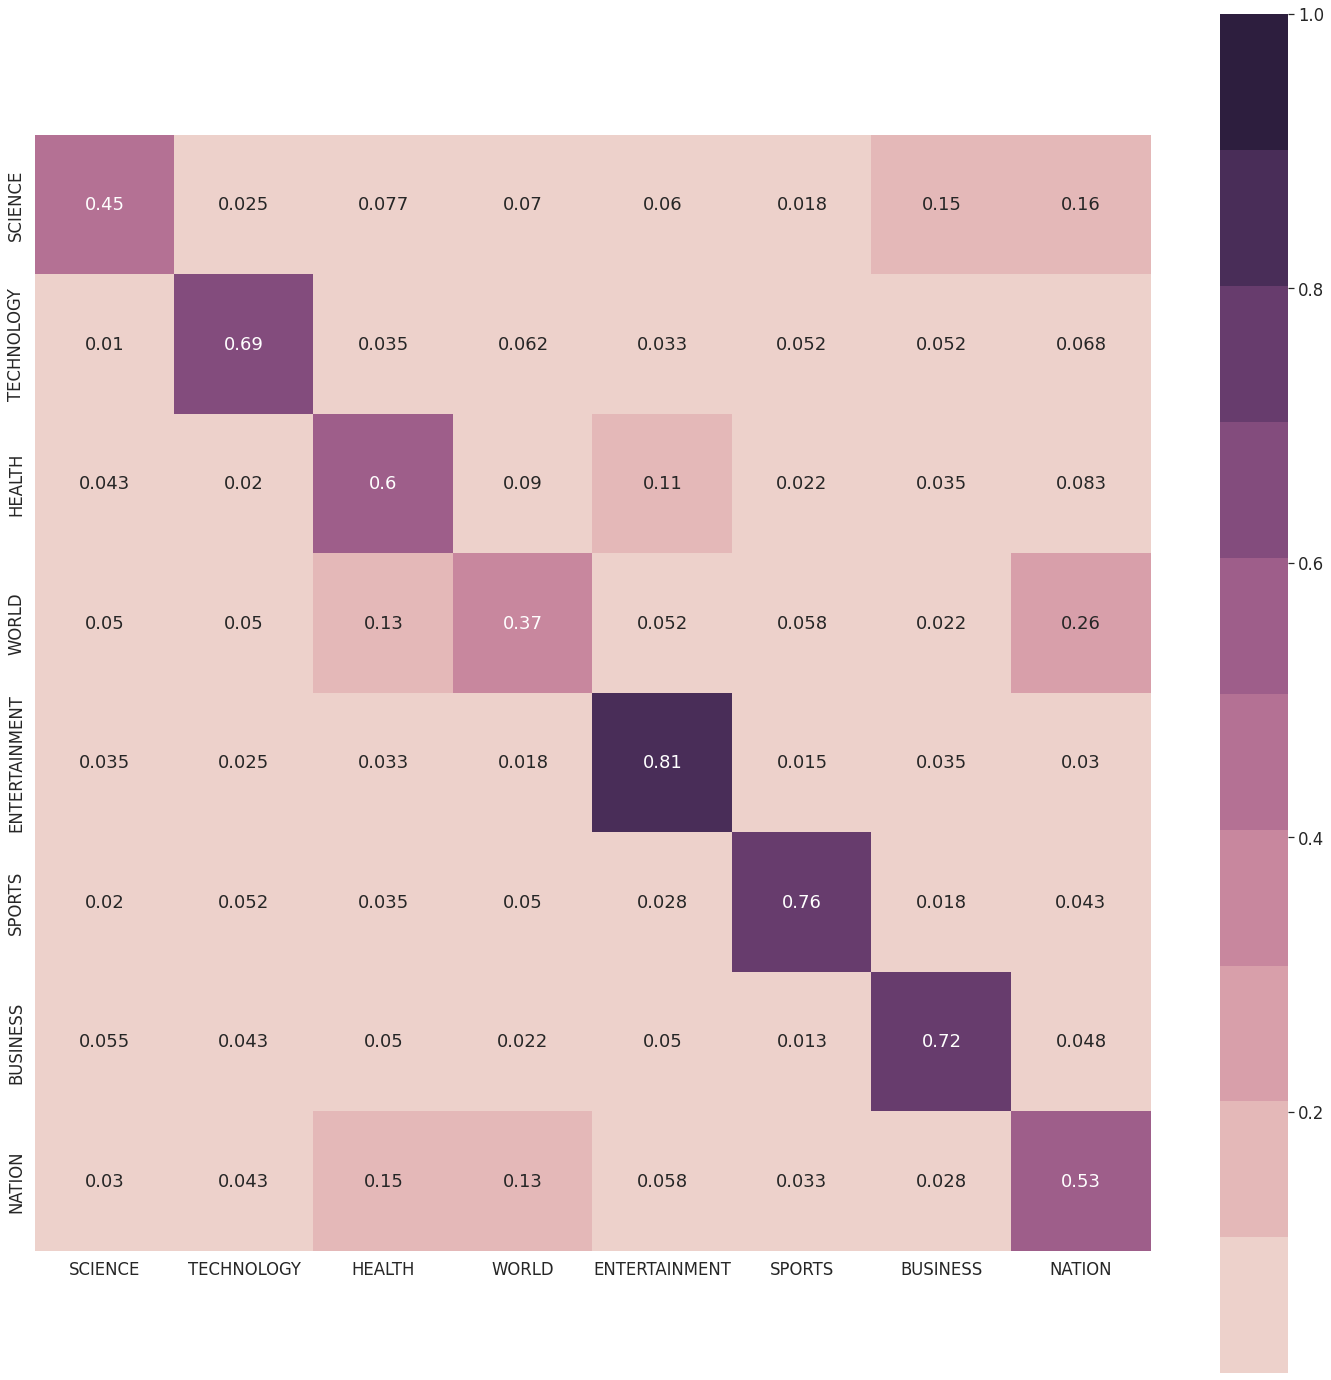

In [ ]:
import seaborn as sn
import numpy as np
cm = confusion_matrix(y_test2, y_pred26)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T
ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, range(len( data['topic'].unique())), range(len( data['topic'].unique())))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels= data['topic'].unique(), yticklabels= data['topic'].unique(), vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    #fig = ax.get_figure()
    #fig.savefig('DT.eps', format='eps', dpi=300, bbox_inches='tight')
    #fig.savefig('DT.png', dpi=300, bbox_inches='tight')

**ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

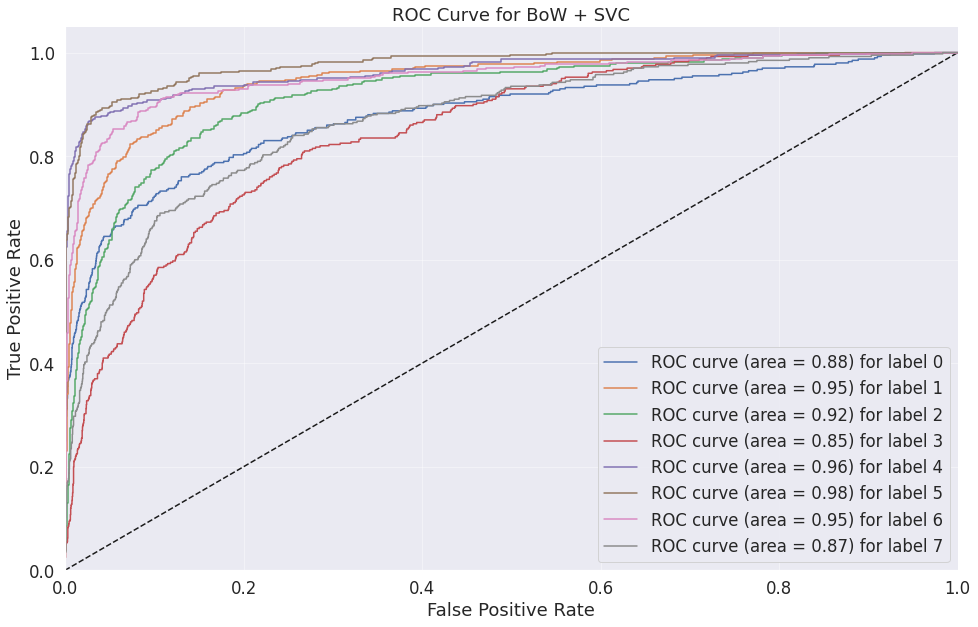

In [ ]:
y_score = model11.decision_function(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for BoW + SVC')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

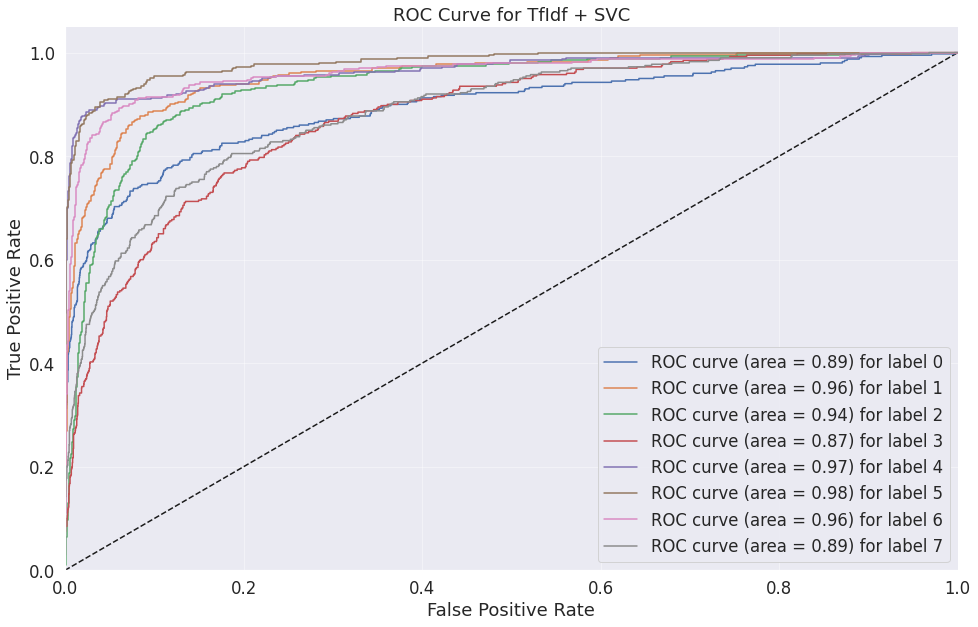

In [ ]:
y_score = model21.decision_function(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for TfIdf + SVC')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

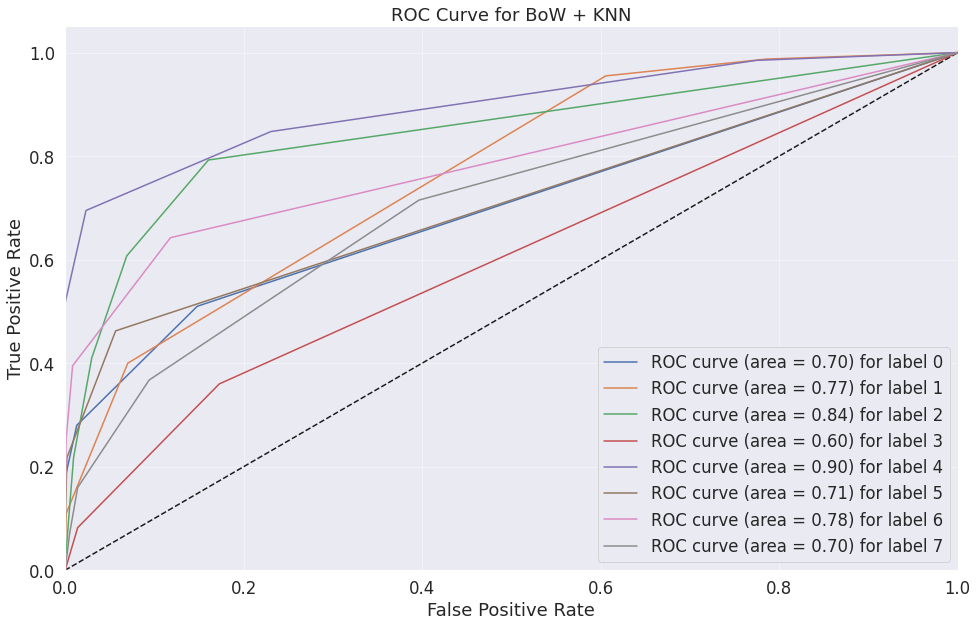

In [ ]:
y_score = model12.predict_proba(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for BoW + KNN')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

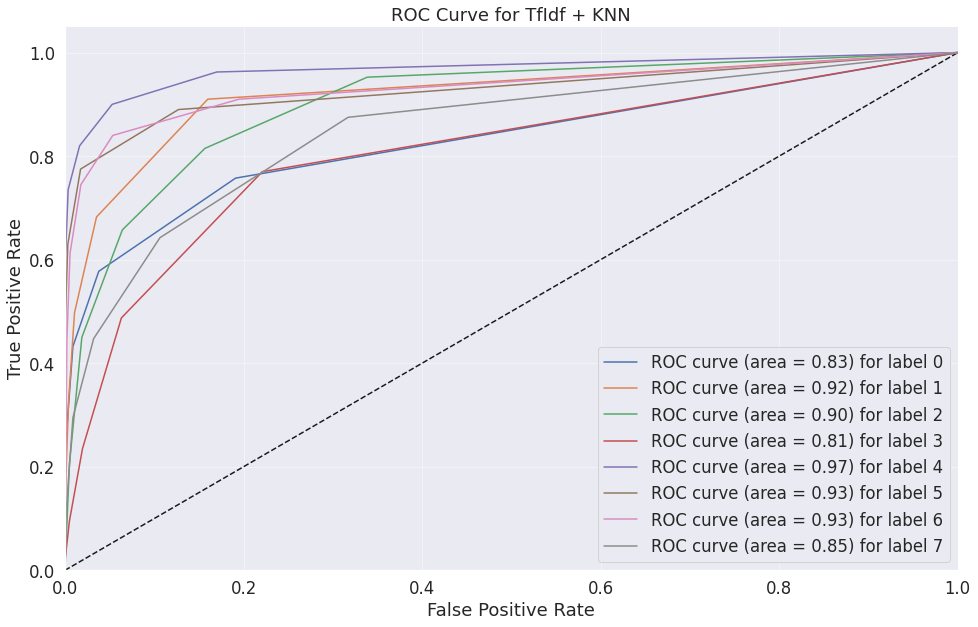

In [ ]:
y_score = model22.predict_proba(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for TfIdf + KNN')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

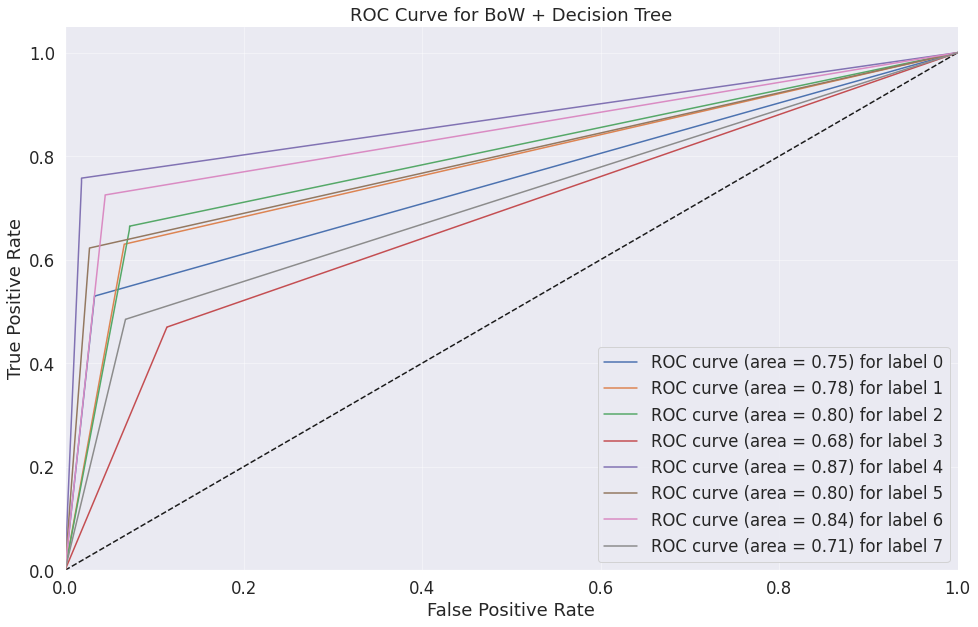

In [ ]:
y_score = model13.predict_proba(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for BoW + Decision Tree')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

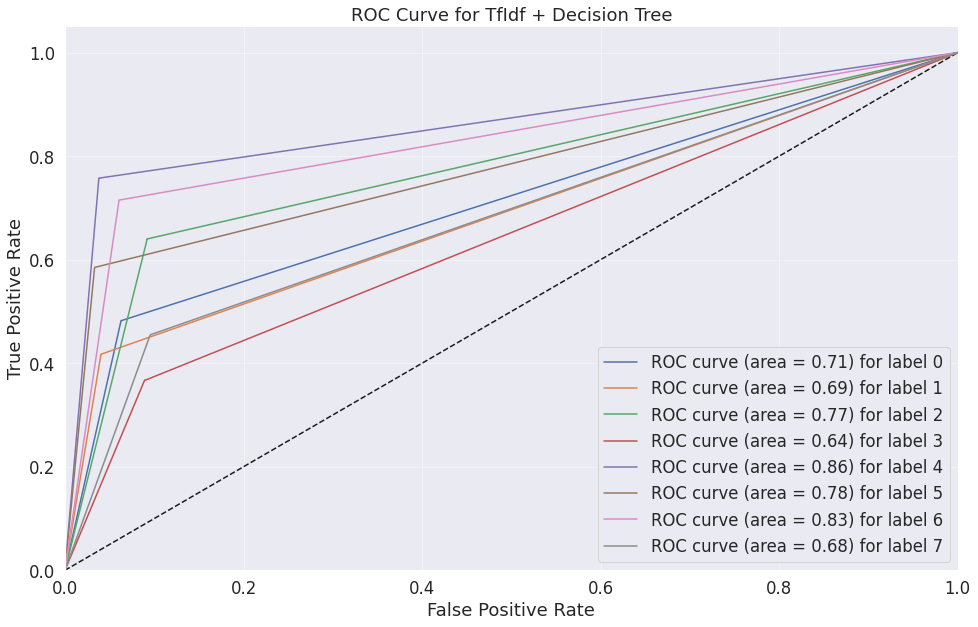

In [ ]:
y_score = model23.predict_proba(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for TfIdf + Decision Tree')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

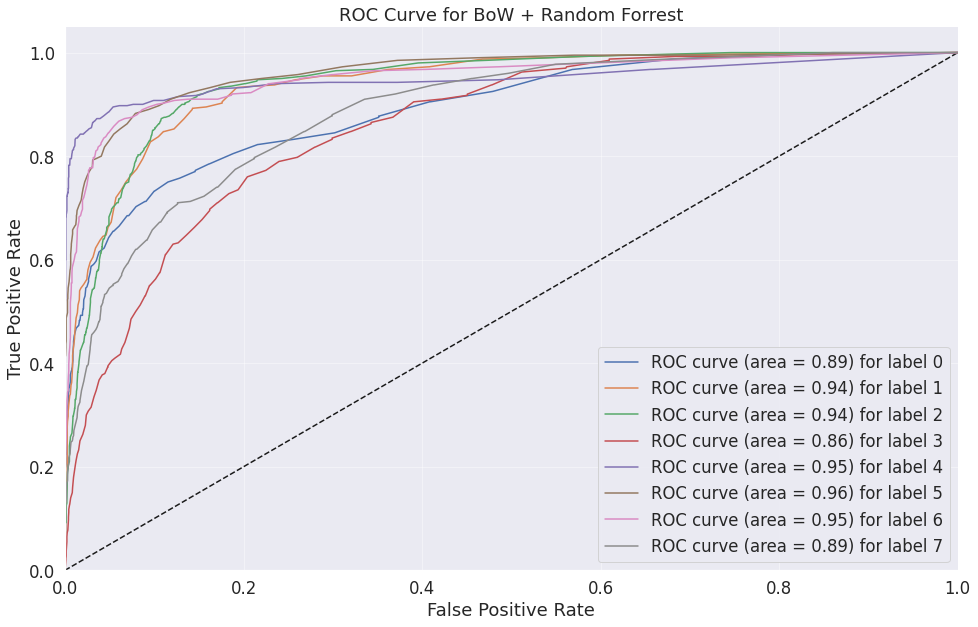

In [ ]:
y_score = model14.predict_proba(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for BoW + Random Forrest')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

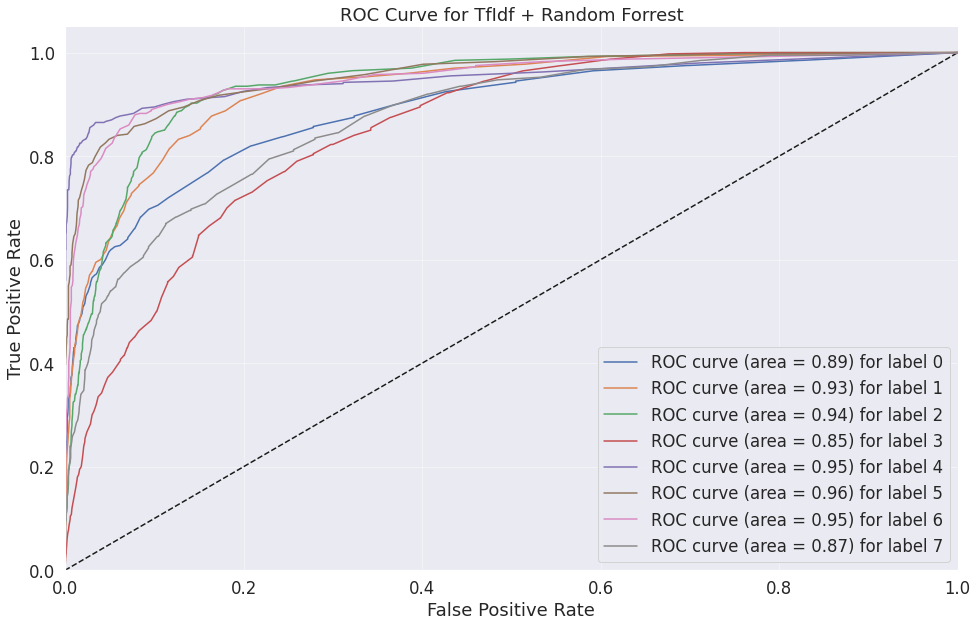

In [ ]:
y_score = model24.predict_proba(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for TfIdf + Random Forrest')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

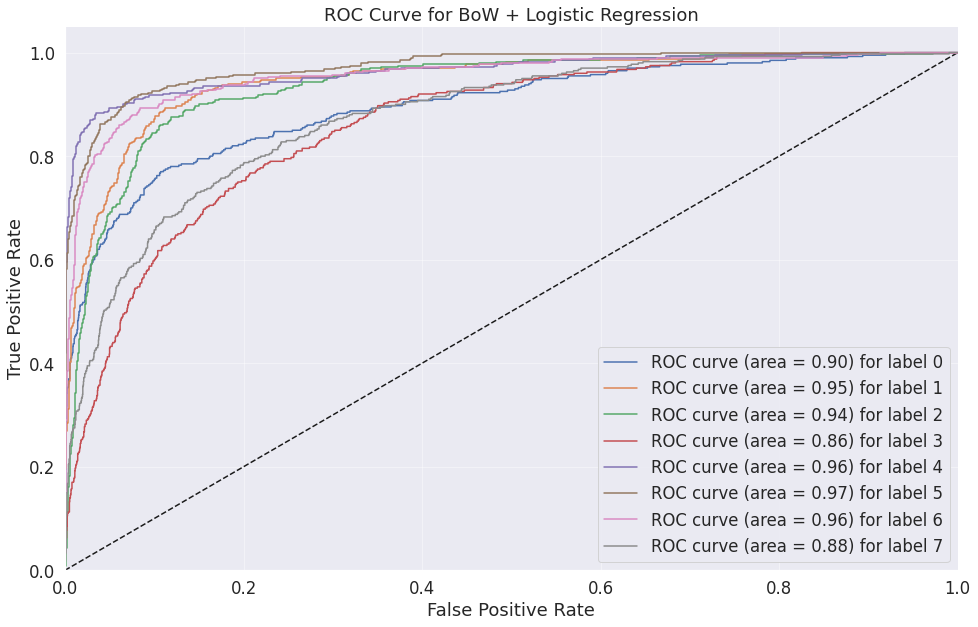

In [ ]:
y_score = model15.decision_function(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for BoW + Logistic Regression')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

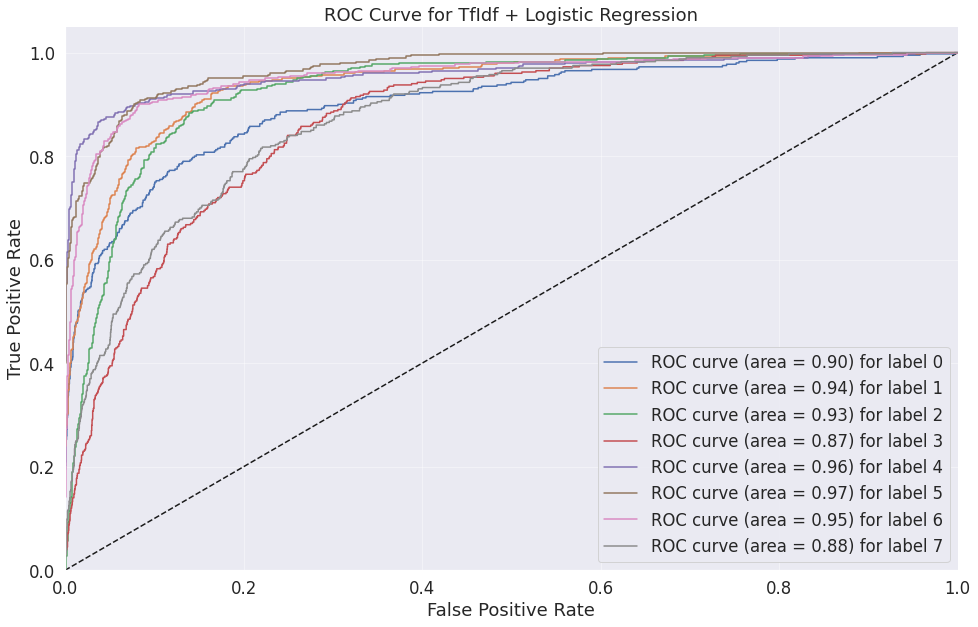

In [ ]:
y_score = model25.decision_function(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for TfIdf + Logistic Regression')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

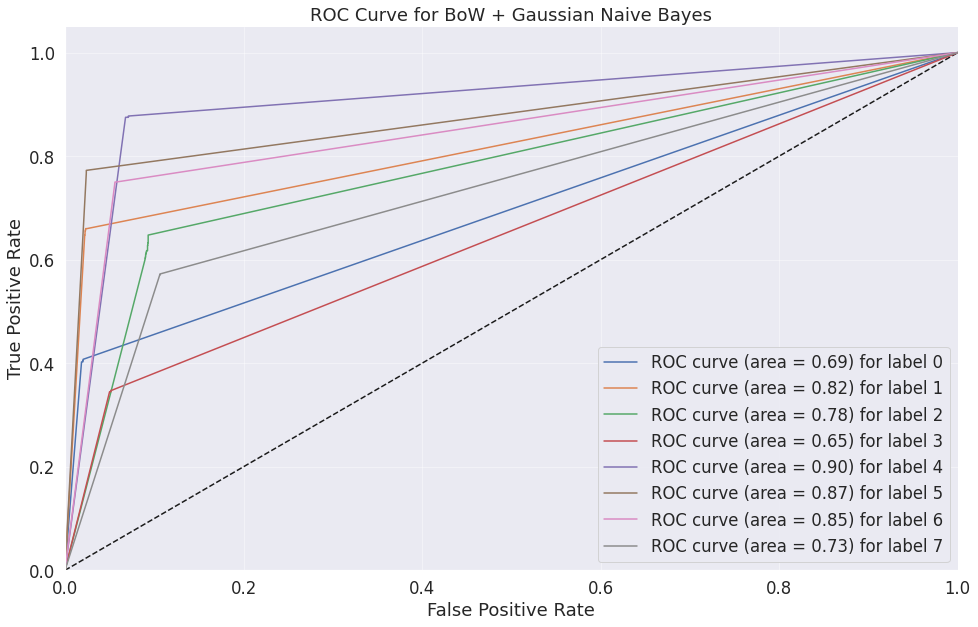

In [ ]:
y_score = model16.predict_proba(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for BoW + Gaussian Naive Bayes')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

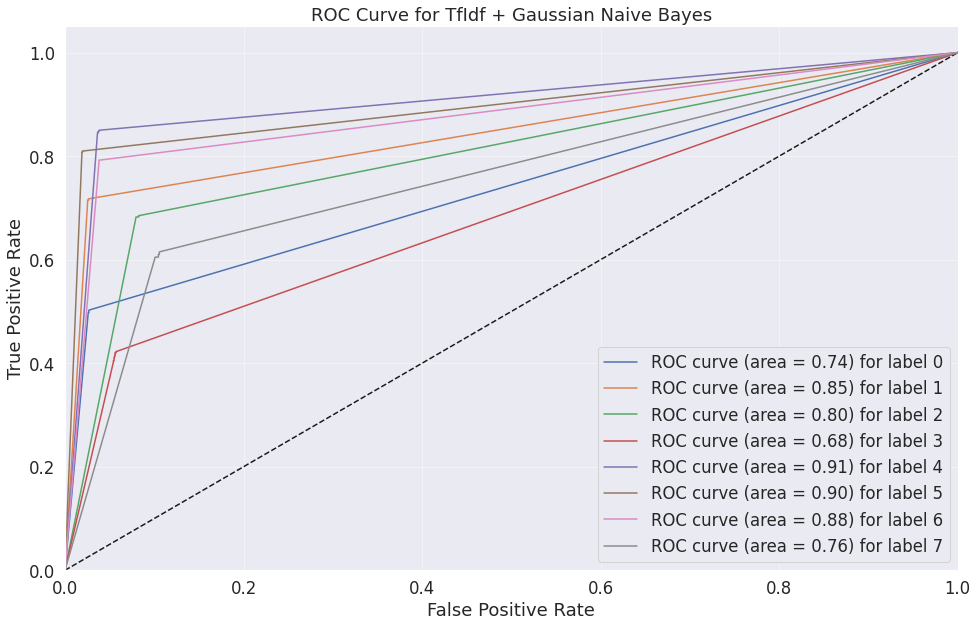

In [ ]:
y_score = model26.predict_proba(X_test1)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test1, drop_first=False).values
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for TfIdf + Gaussian Naive Bayes')
for i in range(8):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()